### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#ff69b4; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #blue"> 🛒📈📊🛍️ | Notebook At a Glance</p>


<h1 style="text-align:center;">Walmart Sales Prediction Machine Learning Project</h1>
<p align="center">
  <img src="https://s.yimg.com/ny/api/res/1.2/rXENBrYvTBAH53uub8.dvg--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTQyNw--/https://media.zenfs.com/en/fortune_175/392698f693225d44aa0a6e78b21dd53c" width="500" height="300">
</p>

# Walmart Sales Prediction Machine Learning Project

## Problem Statement
Predict the sales of Walmart stores.


## Tasks

### Hypothesis based EDA:
1. **Share of sales and profit by product category (top 5)**
   - Analyze the top 5 product categories for their sales and profit contributions.
2. **Share of profit by region**
   - Uncover the profit distribution across different regions.
3. **Share of sales and profit by product name (top 5)**
   - Determine the sales and profit shares of the top 5 product names.
4. **Plot the trend of sales and profit over time as a line chart**
   - Visualize how sales and profit have evolved over time.

### Create new features:
1. **Create average sales per category and average sales by region features and drop the category and region column**
2. **One-hot encode all the other categorical variables.**
3. **Standardize the numerical variables**

### Build Models and compare the results:
1. **Build a Linear Regression and Random Forest on the above data**
2. **Set the date as index and use only sales column to build ARIMA and SARIMA model**
3. **Use Facebook Prophet and build the model**

## FAQs

**Q1. How can I analyze the sales and profit distribution by product category?**
- Perform hypothesis-based EDA to identify the top 5 product categories' sales and profit shares.

**Q2. How can I determine the profit distribution by region?**
- Conduct an analysis to uncover the share of profit attributed to different regions.

**Q3. Which models can I build for sales prediction?**
- Use Linear Regression, Random Forest, ARIMA, SARIMA, and Facebook Prophet models to predict Walmart store sales.


1. [Data Overview](#data-overview)
2. [Importing Libraries](#importing-libraries)
3. [Data Cleaning & Preprocessing](#data-cleaning-and-preprocessing)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
    - [Univariate Analysis](#univariate-analysis)
    - [Bivariate Analysis](#bivariate-analysis)
    - [Multivariate Analysis](#multivariate-analysis)
5. [Data Encoding](#data-encoding)
6. [Data Scaling](#data-scaling)
7. [Data Modeling](#data-modeling)
8. [Model Evaluation](#model-evaluation)
9. [Pipeline](#pipeline)
10. [Deployment](#deployment)

<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    1] 🤗 Adding libraries
</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')
#import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns
from scipy import stats
import scipy
from matplotlib.pyplot import figure
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,RandomizedSearchCV,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from datasist.structdata import detect_outliers
import plotly.express as px 
import plotly.graph_objects as go
import plotly.figure_factory as ff  
import category_encoders as ce

<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    2]  Reading the data
</p>

In [2]:
df = pd.read_csv('Walmart.csv')
df.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [3]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Category', 'Product Name', 'Sales', 'Quantity',
       'Profit'],
      dtype='object')

In [4]:
df.columns = df.columns.str.replace(' ','_').str.lower()
df.columns

Index(['order_id', 'order_date', 'ship_date', 'customer_name', 'country',
       'city', 'state', 'category', 'product_name', 'sales', 'quantity',
       'profit'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       3203 non-null   object 
 1   order_date     3203 non-null   object 
 2   ship_date      3203 non-null   object 
 3   customer_name  3203 non-null   object 
 4   country        3203 non-null   object 
 5   city           3203 non-null   object 
 6   state          3203 non-null   object 
 7   category       3203 non-null   object 
 8   product_name   3203 non-null   object 
 9   sales          3203 non-null   float64
 10  quantity       3203 non-null   float64
 11  profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    2]  Data cleaning & Preprocessing
</p>

In [6]:
# check for missing values
def calculate_missing_values(df):
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    missing_values = missing_values.sort_values(ascending=False)
    return missing_values
calculate_missing_values(df) # there are missing values in the dataset
print("Number of missing values in the dataset is",df.isnull().sum().sum())

Number of missing values in the dataset is 0


In [7]:
# check for duplicate rows  
duplicate_rows = df[df.duplicated()]
print("Number of duplicated rows in the dataset is",duplicate_rows.shape[0])

Number of duplicated rows in the dataset is 0


In [8]:
# Value counts for every feature to check the missing again or unique values
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')

order_id
CA-2013-165330    11
CA-2011-106439     9
CA-2012-104346     9
CA-2012-164882     9
CA-2014-117457     9
                  ..
CA-2014-123701     1
US-2011-167262     1
CA-2014-108091     1
CA-2012-144722     1
CA-2014-119914     1
Name: count, Length: 1611, dtype: int64
**********************************
order_date
03-12-2014    19
12-12-2013    18
09-12-2014    17
13-11-2014    15
07-12-2013    15
              ..
15-03-2012     1
09-05-2013     1
19-05-2014     1
13-03-2014     1
12-04-2012     1
Name: count, Length: 845, dtype: int64
**********************************
ship_date
07-12-2014    27
16-12-2012    20
13-12-2014    15
11-11-2011    14
31-12-2013    14
              ..
08-12-2012     1
19-12-2011     1
19-10-2013     1
29-04-2014     1
17-09-2011     1
Name: count, Length: 911, dtype: int64
**********************************
customer_name
William Brown       24
Arthur Prichep      23
Rick Wilson         19
Greg Guthrie        17
Zuschuss Carroll    16
             

In [9]:
for i in df.columns:
    print(df[i].unique())
    print('**********************************')

['CA-2013-138688' 'CA-2011-115812' 'CA-2013-161389' ... 'CA-2013-125794'
 'CA-2014-121258' 'CA-2014-119914']
**********************************
['13-06-2013' '09-06-2011' '06-12-2013' '13-05-2011' '27-08-2011'
 '25-09-2012' '16-01-2013' '18-07-2013' '24-11-2012' '05-12-2011'
 '12-10-2011' '18-09-2013' '07-11-2014' '18-06-2014' '13-11-2012'
 '02-03-2012' '06-11-2014' '07-11-2013' '14-10-2013' '19-09-2014'
 '07-09-2012' '14-03-2013' '31-05-2012' '28-05-2012' '01-03-2011'
 '12-05-2013' '17-11-2013' '08-11-2013' '05-08-2011' '26-08-2011'
 '31-10-2012' '03-08-2011' '10-12-2014' '29-10-2013' '13-11-2014'
 '11-12-2013' '12-09-2013' '10-11-2012' '29-12-2014' '30-07-2012'
 '17-09-2014' '02-11-2012' '26-09-2012' '26-12-2011' '13-09-2013'
 '19-09-2011' '24-04-2013' '01-09-2012' '12-07-2011' '22-06-2012'
 '16-06-2014' '24-09-2011' '23-07-2011' '21-09-2011' '01-07-2014'
 '09-12-2014' '04-11-2014' '25-06-2014' '15-04-2013' '05-03-2014'
 '22-06-2011' '13-02-2011' '15-12-2012' '23-04-2013' '09-11-2011

In [10]:
# AS order_id is unique for every row so we can drop it
df.drop('order_id',axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,order_date,ship_date,customer_name,country,city,state,category,product_name,sales,quantity,profit
0,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,09-06-2011,14-06-2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_date     3203 non-null   object 
 1   ship_date      3203 non-null   object 
 2   customer_name  3203 non-null   object 
 3   country        3203 non-null   object 
 4   city           3203 non-null   object 
 5   state          3203 non-null   object 
 6   category       3203 non-null   object 
 7   product_name   3203 non-null   object 
 8   sales          3203 non-null   float64
 9   quantity       3203 non-null   float64
 10  profit         3203 non-null   float64
dtypes: float64(3), object(8)
memory usage: 275.4+ KB


In [12]:
# Convert order_date, and ship_date to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     3203 non-null   datetime64[ns]
 1   ship_date      3203 non-null   datetime64[ns]
 2   customer_name  3203 non-null   object        
 3   country        3203 non-null   object        
 4   city           3203 non-null   object        
 5   state          3203 non-null   object        
 6   category       3203 non-null   object        
 7   product_name   3203 non-null   object        
 8   sales          3203 non-null   float64       
 9   quantity       3203 non-null   float64       
 10  profit         3203 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 275.4+ KB


In [13]:
df['customer_name'].unique()

array(['Darrin Van Huff', 'Brosina Hoffman', 'Irene Maddox',
       'Alejandro Grove', 'Zuschuss Donatelli', 'Emily Burns',
       'Eric Hoffmann', 'Ruben Ausman', 'Kunst Miller', 'Brendan Sweed',
       'Duane Noonan', 'Jim Sink', 'Roger Barcio', 'Katherine Ducich',
       'Lena Cacioppo', 'Dave Kipp', 'Troy Staebel', 'Lindsay Shagiari',
       'Lena Creighton', 'Sally Hughsby', 'Helen Andreada',
       'Tamara Willingham', 'Stephanie Phelps', 'Neil Knudson',
       'Dave Brooks', 'Ted Trevino', 'Ruben Dartt', 'Max Jones',
       'Chad Sievert', 'Frank Merwin', 'Mary Zewe', 'Bruce Stewart',
       'Laurel Elliston', 'Jonathan Howell', 'David Bremer',
       'Logan Haushalter', 'Kelly Collister', 'Alan Hwang',
       'Kristen Hastings', 'Barry Blumstein', "Jas O'Carroll",
       'Tracy Blumstein', 'Kelly Lampkin', 'Ben Peterman',
       'Frank Atkinson', 'Grace Kelly', 'Doug Bickford', 'Alyssa Crouse',
       'Ken Lonsdale', 'Clay Cheatham', 'Julia Dunbar', 'Arthur Gainer',
       'Ale

In [14]:
 # As the customer_name column is unique, and does not provide so much info. so we can drop it
df.drop('customer_name',axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,order_date,ship_date,country,city,state,category,product_name,sales,quantity,profit
0,2013-06-13,2013-06-17,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,2011-06-09,2011-06-14,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,2011-06-09,2011-06-14,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,2011-06-09,2011-06-14,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,2011-06-09,2011-06-14,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78


In [15]:
df["order_date"].value_counts()

order_date
2014-12-03    19
2013-12-12    18
2014-12-09    17
2014-11-13    15
2013-12-07    15
              ..
2012-03-15     1
2013-05-09     1
2014-05-19     1
2014-03-13     1
2012-04-12     1
Name: count, Length: 845, dtype: int64

In [16]:
# From order_time, ship_time extract the year, month, week, day, day of week, day of week num, hour
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day
df['order_dayofweek'] = df['order_date'].dt.day_name()
df['order_dayofweek_num'] = df['order_date'].dt.dayofweek
df['order_hour'] = df['order_date'].dt.hour

df['ship_year'] = df['ship_date'].dt.year
df['ship_month'] = df['ship_date'].dt.month
df['ship_day'] = df['ship_date'].dt.day
df['ship_dayofweek'] = df['ship_date'].dt.day_name()
df['ship_dayofweek_num'] = df['ship_date'].dt.dayofweek
df['ship_hour'] = df['ship_date'].dt.hour

day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

df['order_dayofweek'] = df['order_dayofweek_num'].map(day_map)
df['ship_dayofweek'] = df['ship_dayofweek_num'].map(day_map)
df['ship_time'] = (df['ship_date'] - df['order_date']).dt.days

df.drop(['order_date','ship_date'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,country,city,state,category,product_name,sales,quantity,profit,order_year,order_month,...,order_dayofweek,order_dayofweek_num,order_hour,ship_year,ship_month,ship_day,ship_dayofweek,ship_dayofweek_num,ship_hour,ship_time
0,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,6,...,Thu,3,0,2013,6,17,Mon,0,0,4
1,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,6,...,Thu,3,0,2011,6,14,Tue,1,0,5
2,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011,6,...,Thu,3,0,2011,6,14,Tue,1,0,5
3,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011,6,...,Thu,3,0,2011,6,14,Tue,1,0,5
4,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011,6,...,Thu,3,0,2011,6,14,Tue,1,0,5


In [17]:
print(df['order_hour'].unique())
print(df['ship_hour'].unique())
# Drop ship, order hour columns
df.drop(['order_hour','ship_hour'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

[0]
[0]


,country,city,state,category,product_name,sales,quantity,profit,order_year,order_month,order_day,order_dayofweek,order_dayofweek_num,ship_year,ship_month,ship_day,ship_dayofweek,ship_dayofweek_num,ship_time
0,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,6,13,Thu,3,2013,6,17,Mon,0,4
1,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,6,9,Thu,3,2011,6,14,Tue,1,5
2,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011,6,9,Thu,3,2011,6,14,Tue,1,5
3,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011,6,9,Thu,3,2011,6,14,Tue,1,5
4,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011,6,9,Thu,3,2011,6,14,Tue,1,5


<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    4]  Exploratory Data Analysis
</p>

In [18]:
# check the dataset shape
print("Number of Columns in data",df.shape[1])
print("---------------------------------------")
print("Number of Rows in data",df.shape[0])

Number of Columns in data 19
---------------------------------------
Number of Rows in data 3203


In [19]:
df.describe(include='object').T 

,count,unique,top,freq
country,3203,1,United States,3203
city,3203,169,Los Angeles,747
state,3203,11,California,2001
category,3203,17,Binders,471
product_name,3203,1494,Staples,60
order_dayofweek,3203,7,Thu,585
ship_dayofweek,3203,7,Sat,576


In [20]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
sales,3203.0,226.493266,524.876911,0.99,19.44,60.84,215.81,13999.96
quantity,3203.0,3.828910,2.260947,1.00,2.00,3.00,5.00,14.00
profit,3203.0,33.849138,174.109155,-3399.98,3.85,11.17,33.00,6719.98
order_year,3203.0,2012.729941,1.138640,2011.00,2012.00,2013.00,2014.00,2014.00
order_month,3203.0,8.025289,3.254793,1.00,5.00,9.00,11.00,12.00
order_day,3203.0,15.994380,8.627265,1.00,9.00,16.00,23.00,31.00
order_dayofweek_num,3203.0,2.402747,1.685858,0.00,1.00,2.00,4.00,6.00
ship_year,3203.0,2012.747424,1.144559,2011.00,2012.00,2013.00,2014.00,2015.00
ship_month,3203.0,7.942866,3.325490,1.00,5.00,9.00,11.00,12.00
ship_day,3203.0,16.035904,8.830963,1.00,9.00,16.00,24.00,31.00


<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    4]  EDA Univariate Analysis
</p>

In [21]:
def CPlot(feature) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    sns.countplot(x = feature,data=df,facecolor = (0,0,0,0),linewidth = 5,
                  edgecolor= sns.color_palette('dark',3))
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    return None

def KPlot(feature) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    sns.kdeplot(df[feature],shade=True)
    return None

def Pie(feature,limit=20) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(df[feature].value_counts()[:limit],labels = list(df[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    return None

In [22]:
df.columns

Index(['country', 'city', 'state', 'category', 'product_name', 'sales',
       'quantity', 'profit', 'order_year', 'order_month', 'order_day',
       'order_dayofweek', 'order_dayofweek_num', 'ship_year', 'ship_month',
       'ship_day', 'ship_dayofweek', 'ship_dayofweek_num', 'ship_time'],
      dtype='object')

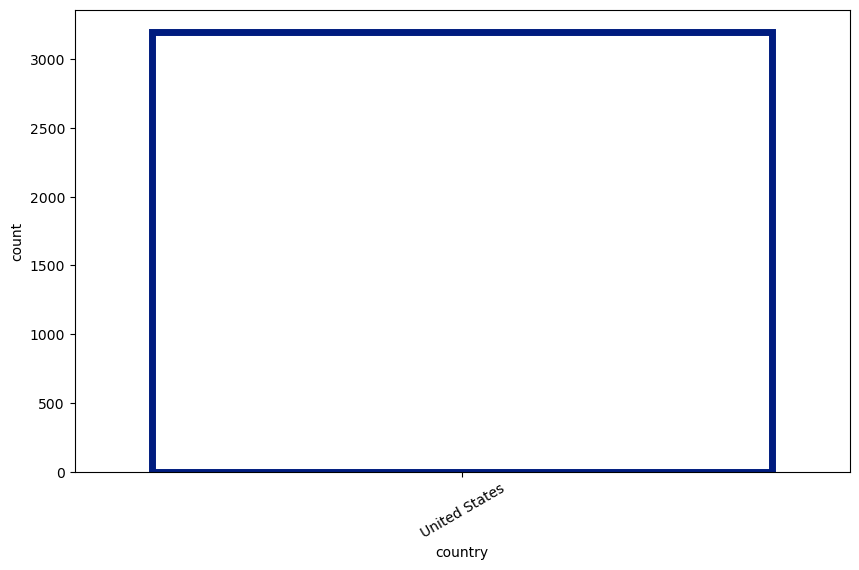

In [23]:
CPlot('country')

In [24]:
df["country"].unique() # there is only one country in the dataset so we can drop it

array(['United States'], dtype=object)

In [25]:
df.drop('country',axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)  
df.head()

,city,state,category,product_name,sales,quantity,profit,order_year,order_month,order_day,order_dayofweek,order_dayofweek_num,ship_year,ship_month,ship_day,ship_dayofweek,ship_dayofweek_num,ship_time
0,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,6,13,Thu,3,2013,6,17,Mon,0,4
1,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,6,9,Thu,3,2011,6,14,Tue,1,5
2,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011,6,9,Thu,3,2011,6,14,Tue,1,5
3,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011,6,9,Thu,3,2011,6,14,Tue,1,5
4,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011,6,9,Thu,3,2011,6,14,Tue,1,5


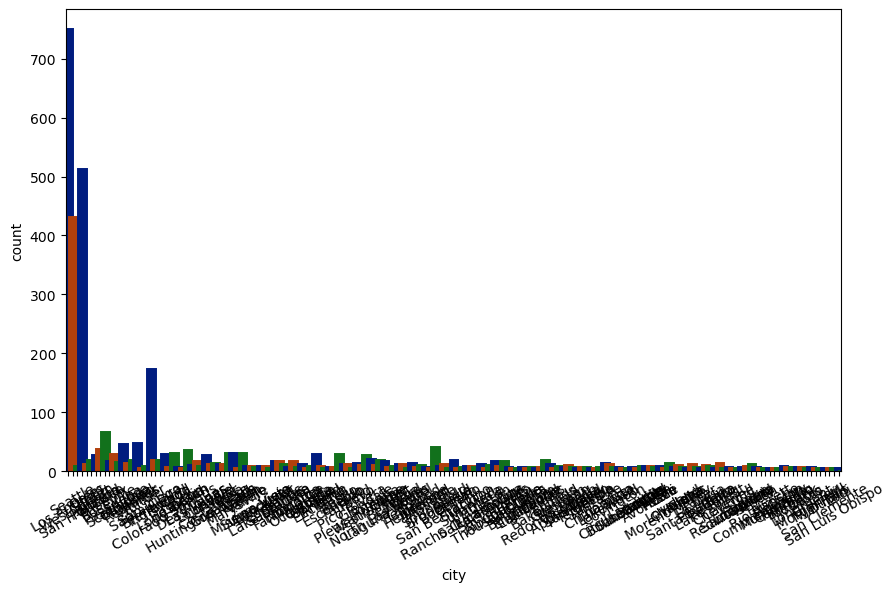

In [26]:
CPlot("city")

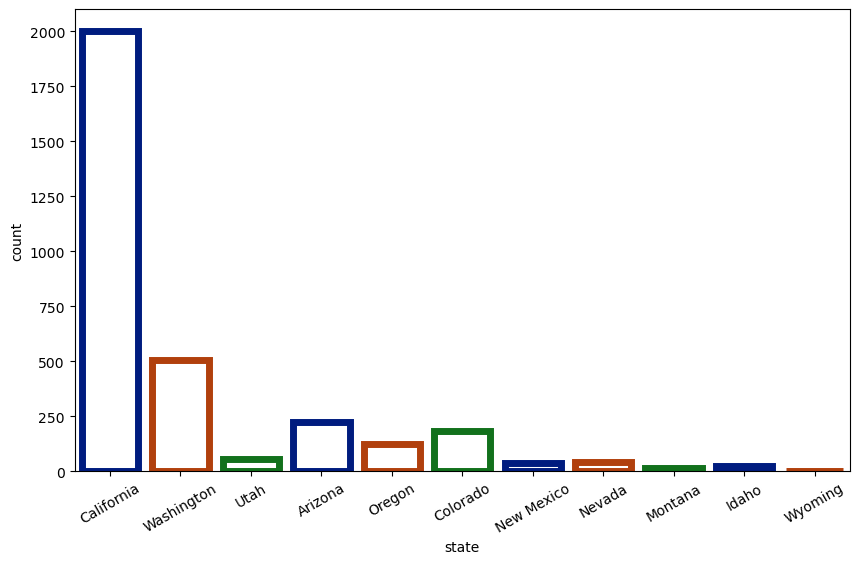

In [27]:
CPlot("state")

In [28]:
df["product_name"].nunique() # there are 1494 unique products in the dataset

1494

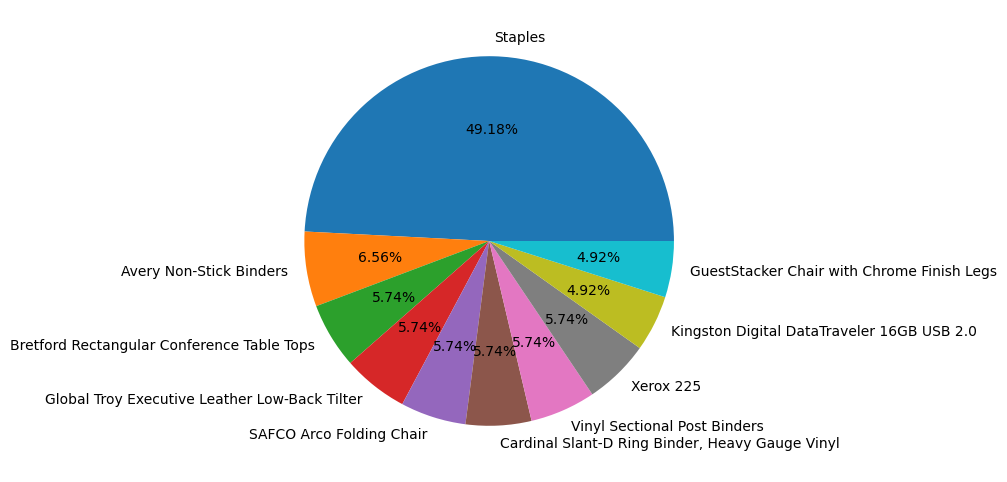

In [29]:
Pie("product_name",10)

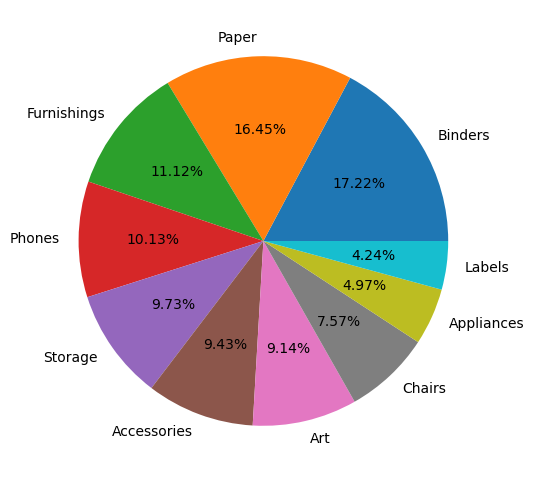

In [30]:
Pie("category",10)

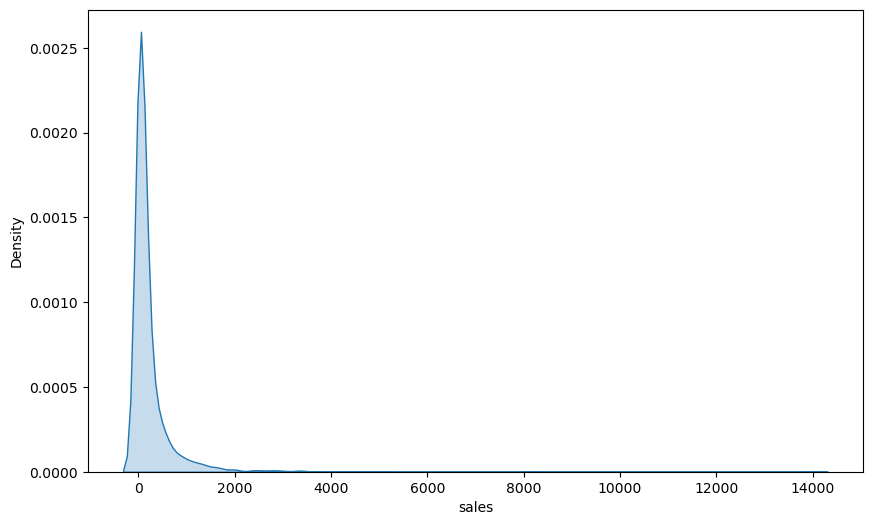

In [31]:
KPlot("sales")

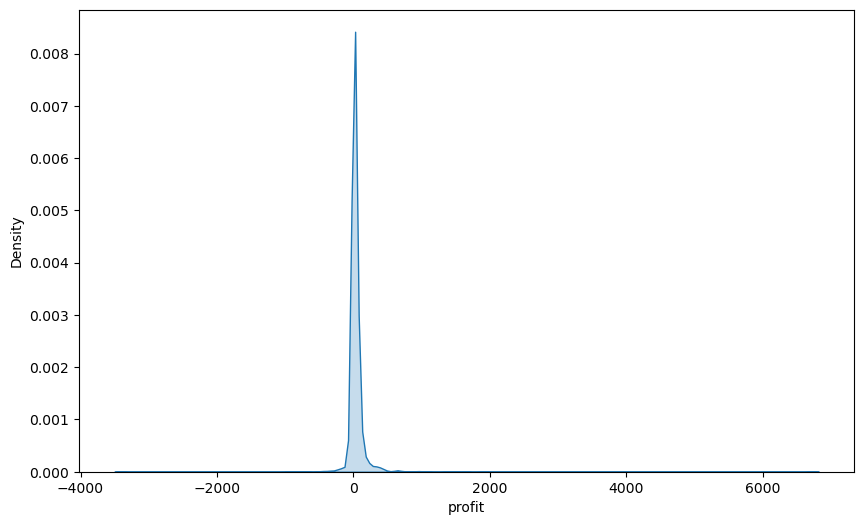

In [32]:
KPlot("profit")

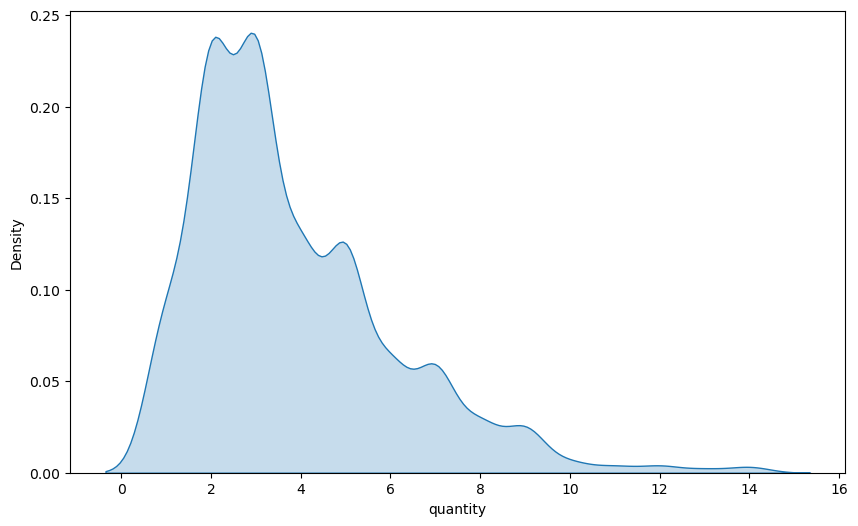

In [33]:
KPlot("quantity")

<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    4]  EDA Bivariate Analysis
</p>

<Axes: xlabel='category'>

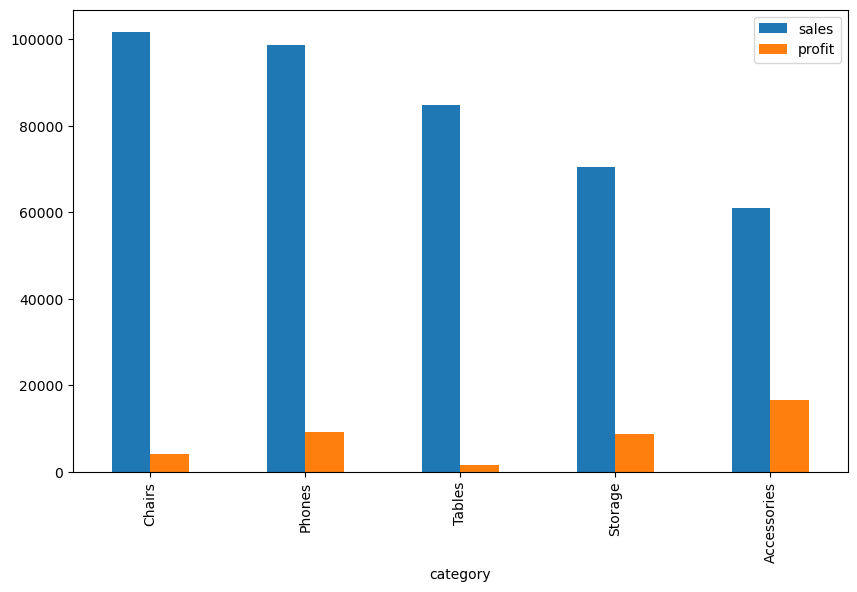

In [34]:
# Share of sales and profit by product category (top 5)

df.groupby('category')[['sales','profit']].sum().sort_values(by='sales',ascending=False).head().plot(kind='bar',figsize=(10,6))

<Axes: xlabel='state'>

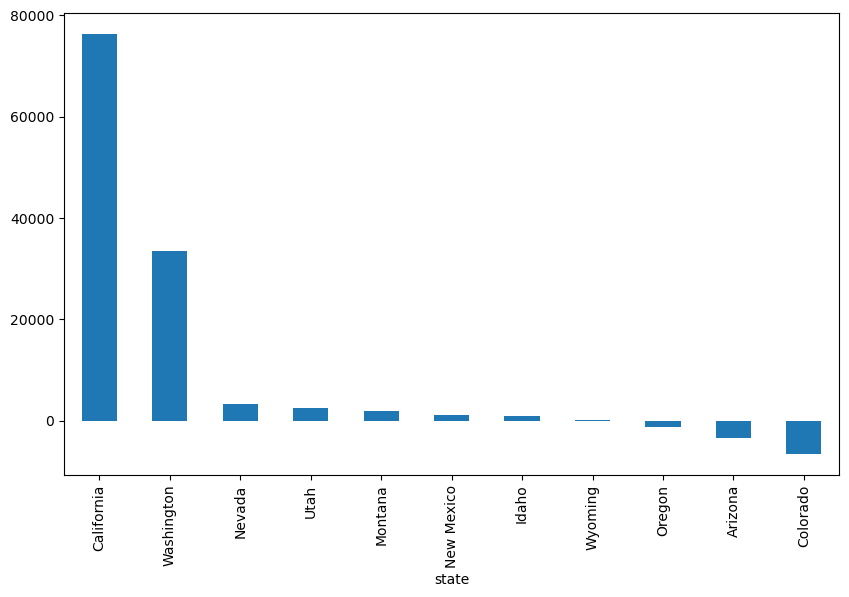

In [35]:
# Share of profit by state
df.groupby('state')['profit'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,6))

<Axes: xlabel='city'>

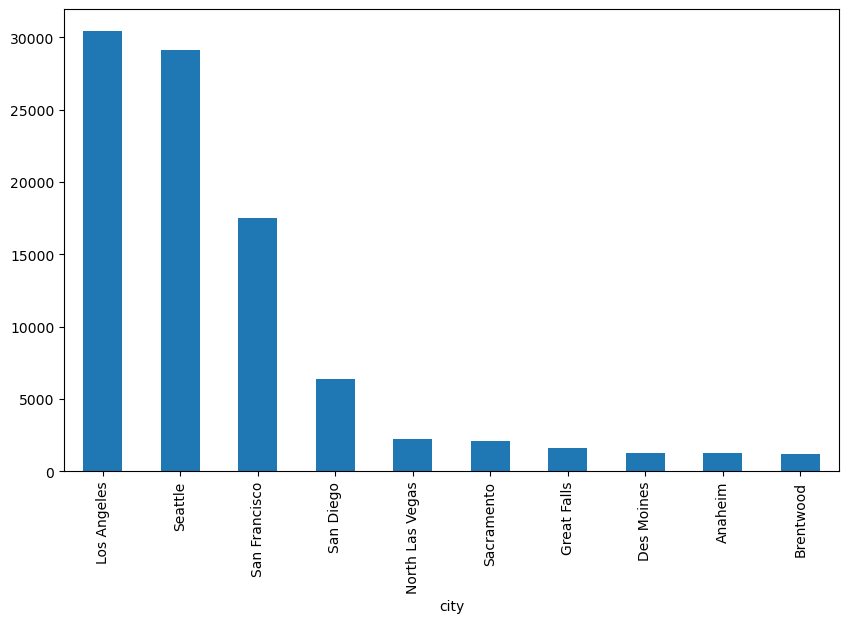

In [36]:
# Share of profit by city top 10
df.groupby('city')['profit'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,6))


<Axes: xlabel='product_name'>

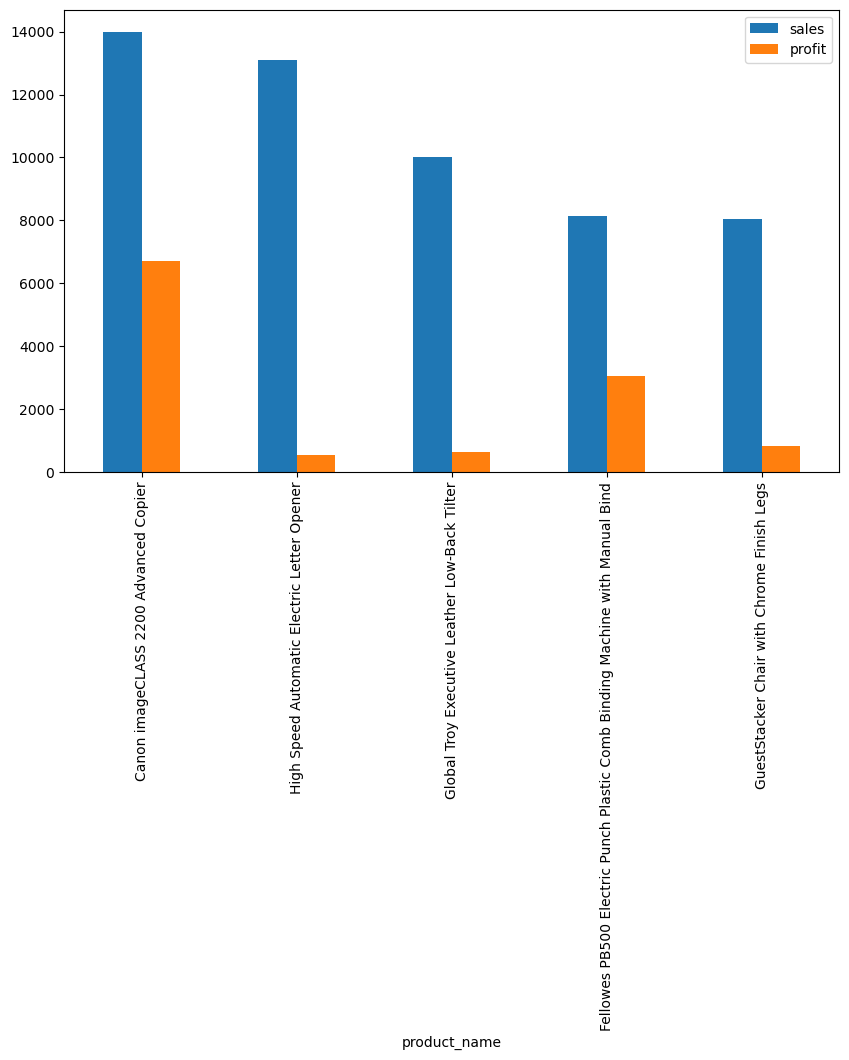

In [37]:
# Share of sales and profit by product name (top 5) 

df.groupby('product_name')[['sales','profit']].sum().sort_values(by='sales',ascending=False).head().plot(kind='bar',figsize=(10,6))

<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    4]  EDA Multivariate Analysis
</p>

In [38]:
df.head()

,city,state,category,product_name,sales,quantity,profit,order_year,order_month,order_day,order_dayofweek,order_dayofweek_num,ship_year,ship_month,ship_day,ship_dayofweek,ship_dayofweek_num,ship_time
0,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,6,13,Thu,3,2013,6,17,Mon,0,4
1,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,6,9,Thu,3,2011,6,14,Tue,1,5
2,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011,6,9,Thu,3,2011,6,14,Tue,1,5
3,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011,6,9,Thu,3,2011,6,14,Tue,1,5
4,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011,6,9,Thu,3,2011,6,14,Tue,1,5


<Axes: xlabel='ship_year'>

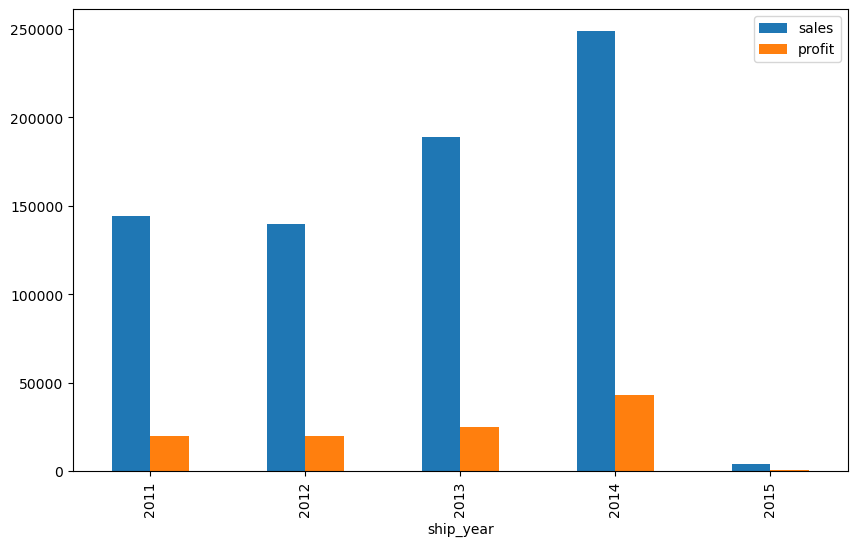

In [39]:
# Multivariate Analysis
# Sales and profit over ship time

df.groupby('ship_year')[['sales','profit']].sum().plot(kind='bar',figsize=(10,6))


In [40]:
df.head()

,city,state,category,product_name,sales,quantity,profit,order_year,order_month,order_day,order_dayofweek,order_dayofweek_num,ship_year,ship_month,ship_day,ship_dayofweek,ship_dayofweek_num,ship_time
0,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,6,13,Thu,3,2013,6,17,Mon,0,4
1,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,6,9,Thu,3,2011,6,14,Tue,1,5
2,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97,2011,6,9,Thu,3,2011,6,14,Tue,1,5
3,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011,6,9,Thu,3,2011,6,14,Tue,1,5
4,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011,6,9,Thu,3,2011,6,14,Tue,1,5


<Axes: xlabel='ship_month'>

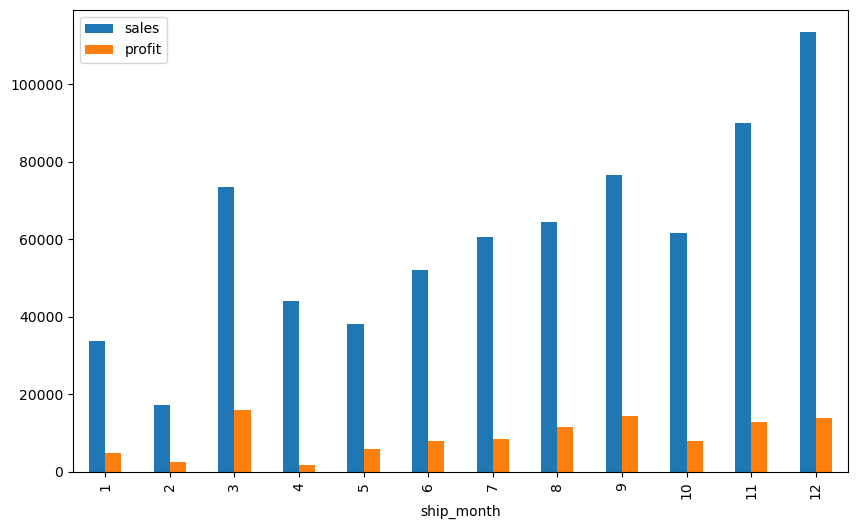

In [41]:
# Sales and profit by ship month
df.groupby('ship_month')[['sales','profit']].sum().plot(kind='bar',figsize=(10,6))

<Axes: xlabel='product_name'>

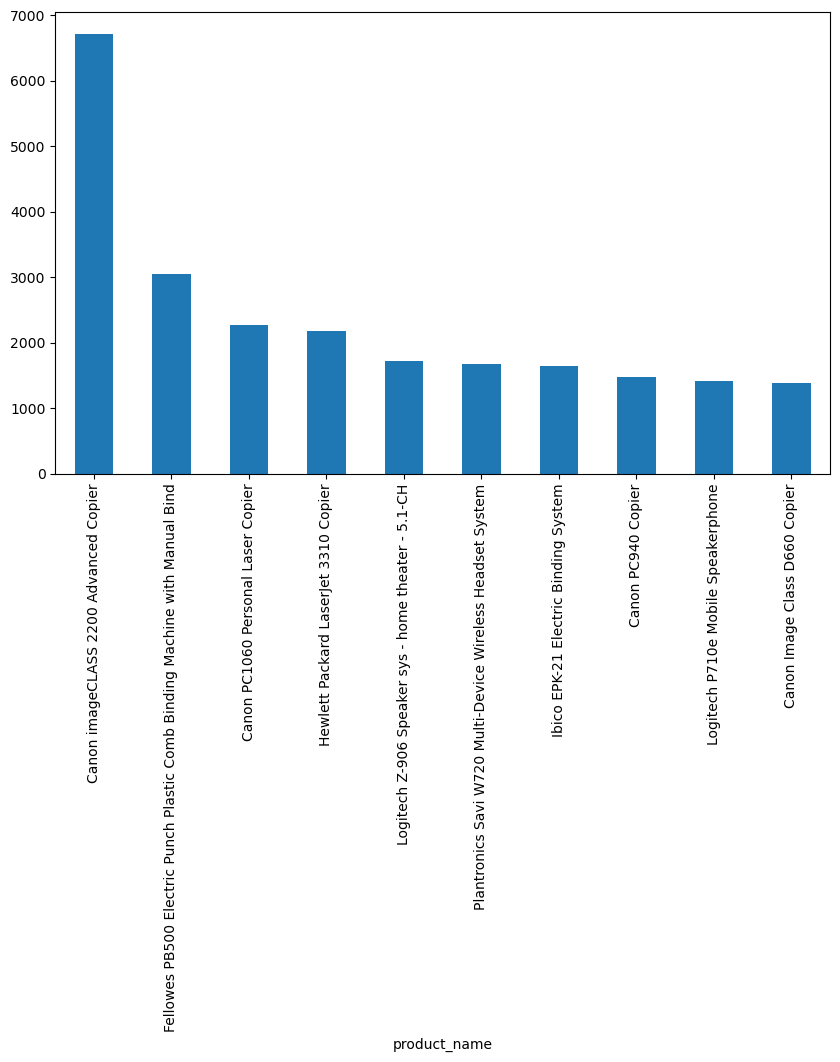

In [42]:
# Which product is most profitable
df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,6))

In [43]:
df.columns

Index(['city', 'state', 'category', 'product_name', 'sales', 'quantity',
       'profit', 'order_year', 'order_month', 'order_day', 'order_dayofweek',
       'order_dayofweek_num', 'ship_year', 'ship_month', 'ship_day',
       'ship_dayofweek', 'ship_dayofweek_num', 'ship_time'],
      dtype='object')

<Axes: xlabel='product_name'>

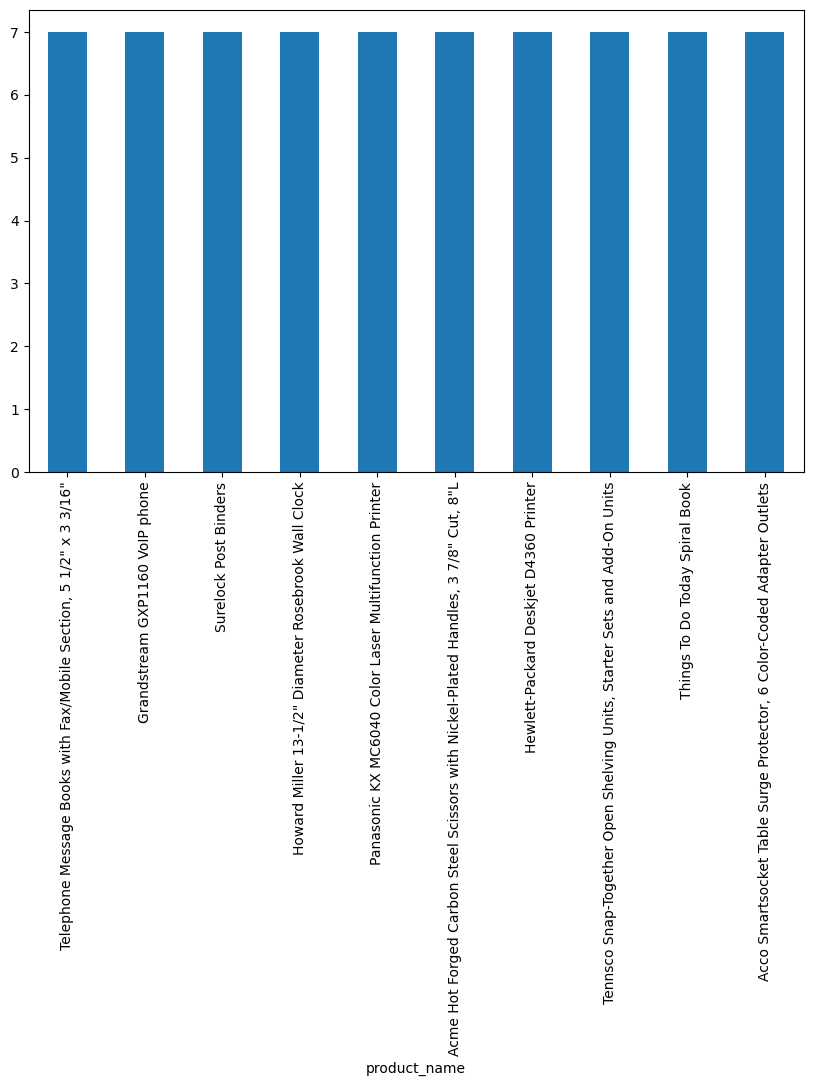

In [44]:
# Which product take the longest time to ship
df.groupby('product_name')['ship_time'].mean().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,6))

<Axes: xlabel='product_name'>

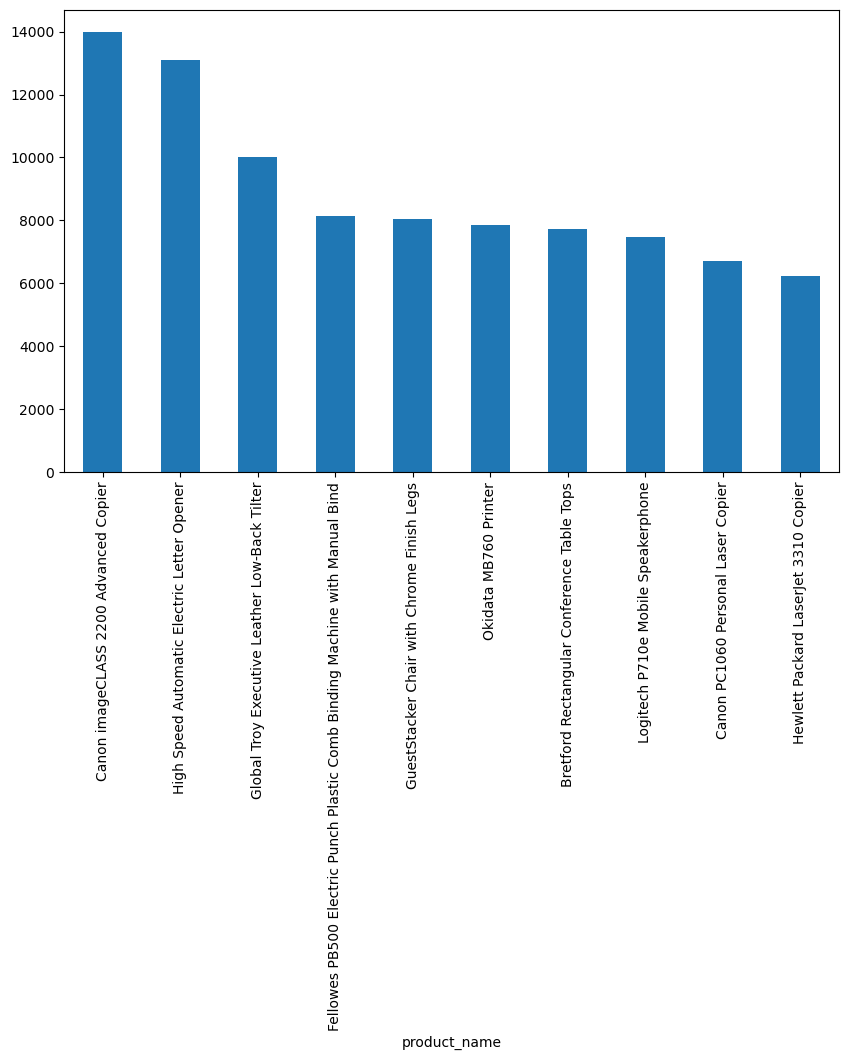

In [45]:
# Which product has the highest sales
df.groupby('product_name')['sales'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,6))

<Axes: xlabel='product_name'>

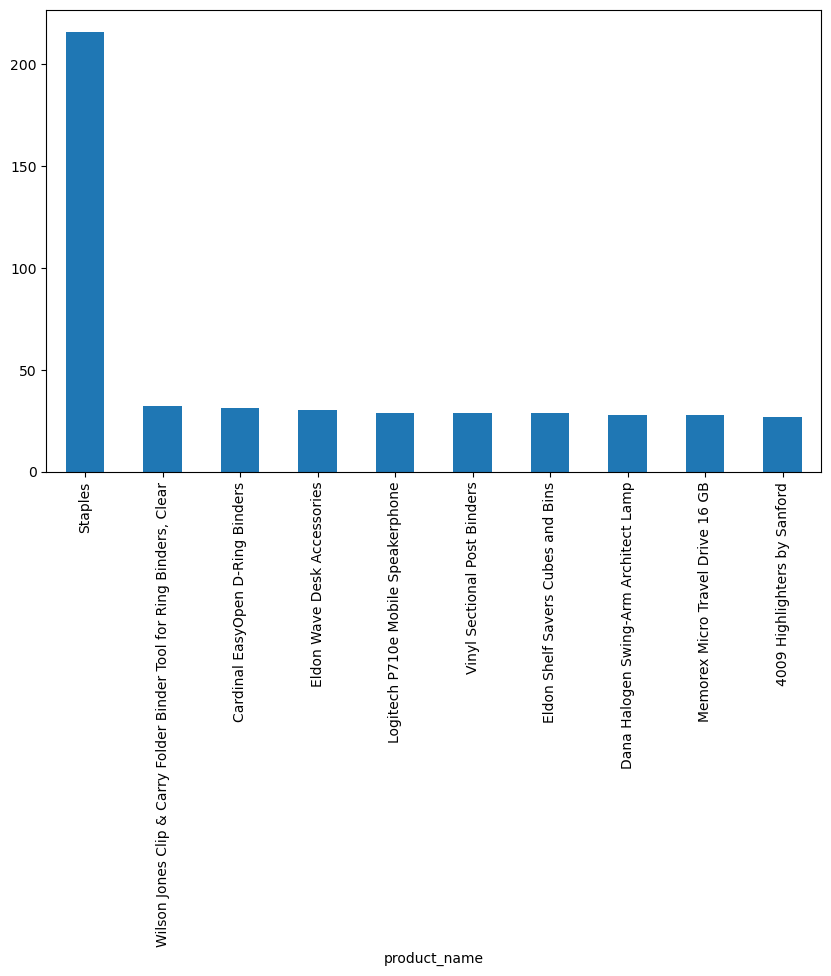

In [46]:
# Which product has the highest quantity
df.groupby('product_name')['quantity'].sum().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(10,6))

<Axes: xlabel='order_dayofweek'>

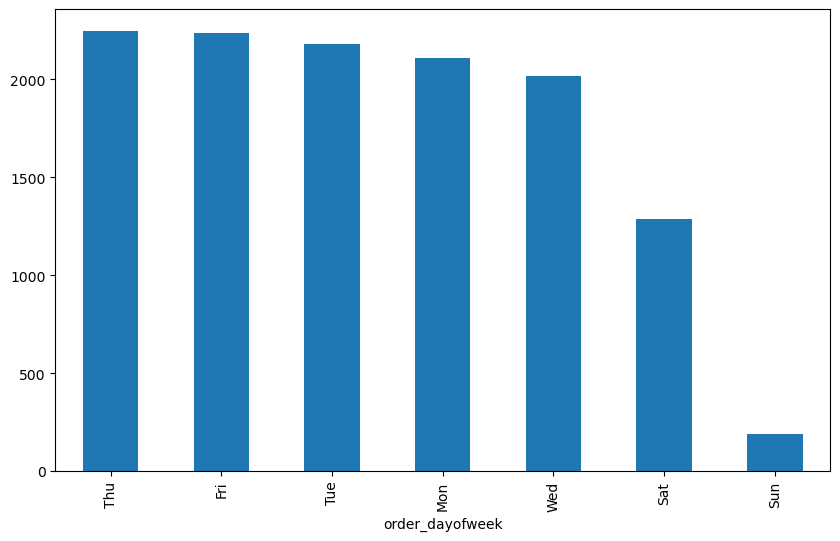

In [47]:
# Quantity per order of week which week ?
df.groupby('order_dayofweek')['quantity'].sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,6))


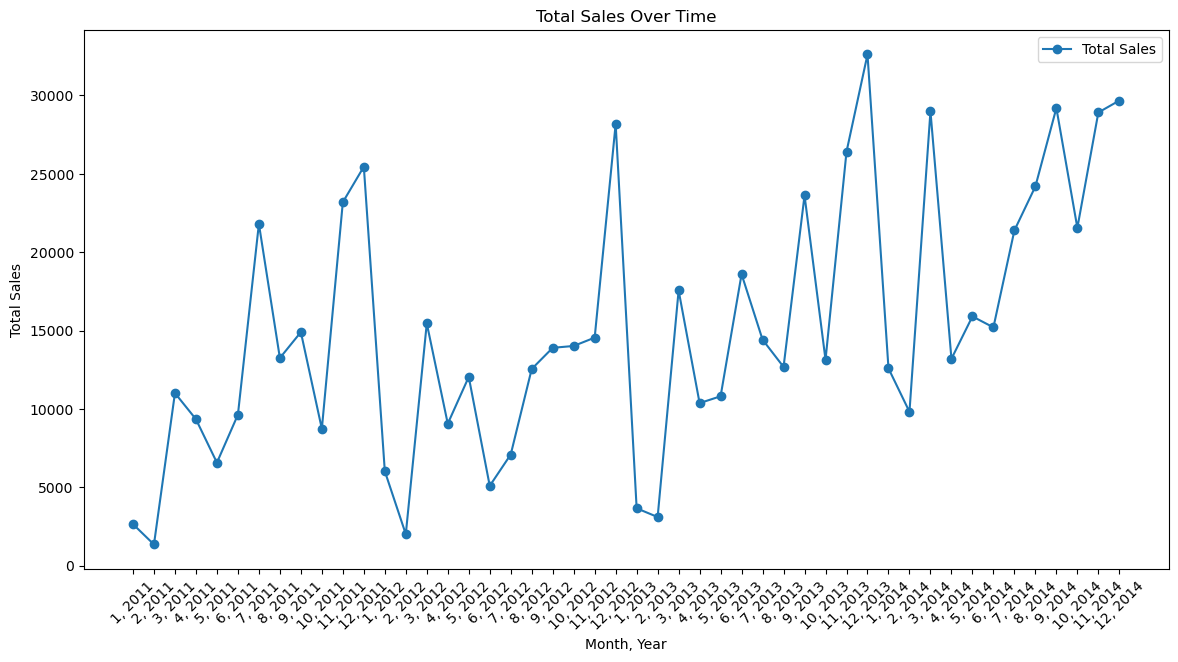

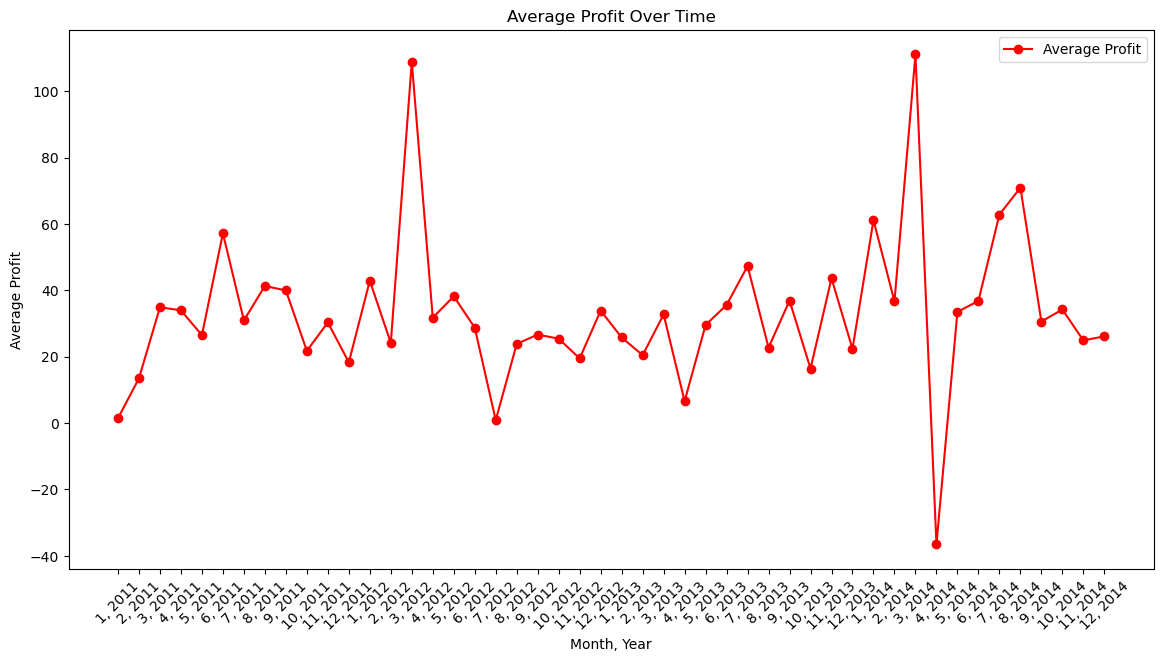

In [48]:
# Plot the trend of sales and profit over time as line chart
import matplotlib.pyplot as plt


# Group the data by year and month
monthly_aggregates = df.groupby(['order_year', 'order_month']).agg(
    total_sales=('sales', 'sum'),        # Total sales per month
    average_profit=('profit', 'mean')    # Average profit per month
).reset_index()

# Create a combined 'year_month' column for plotting
monthly_aggregates['year_month'] = monthly_aggregates['order_month'].astype(str) + ", " + monthly_aggregates['order_year'].astype(str)

# Resetting index to make 'year_month' a column
monthly_aggregates = monthly_aggregates.reset_index(drop=True)

# Plotting total sales over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_aggregates['year_month'], monthly_aggregates['total_sales'], label='Total Sales', marker='o')
plt.xlabel('Month, Year')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.xticks(rotation=45)
plt.legend()

# Plotting average profit over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_aggregates['year_month'], monthly_aggregates['average_profit'], label='Average Profit', color='red', marker='o')
plt.xlabel('Month, Year')
plt.ylabel('Average Profit')
plt.title('Average Profit Over Time')
plt.xticks(rotation=45)
plt.legend()

plt.show()


<Axes: xlabel='order_day'>

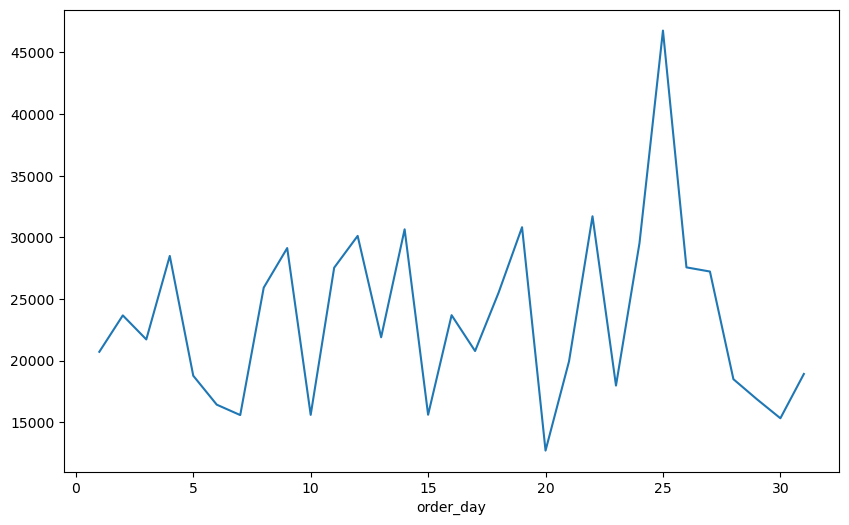

In [49]:
## Average Daily Sales
daily_sales = df.groupby('order_day')['sales'].sum()
daily_sales.plot(kind='line',figsize=(10,6))


<Axes: xlabel='order_day'>

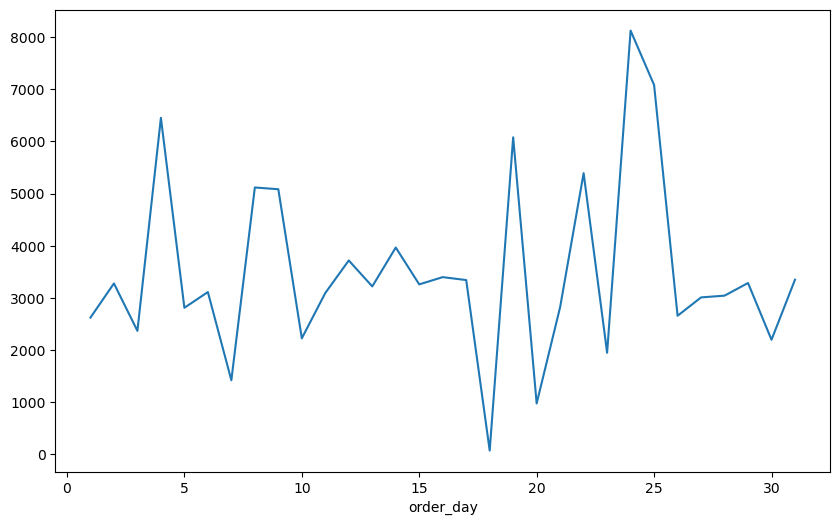

In [50]:
## Average Daily Profit
daily_profit = df.groupby('order_day')['profit'].sum()
daily_profit.plot(kind='line',figsize=(10,6))

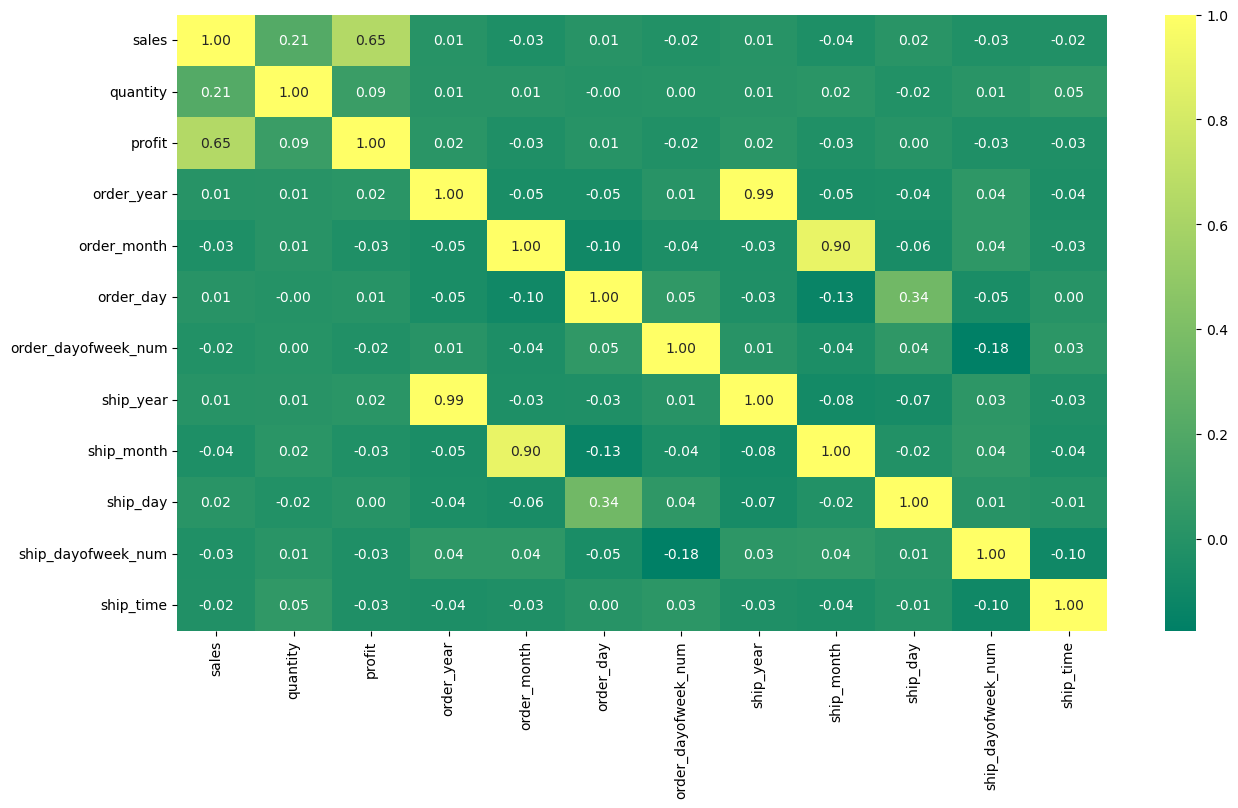

In [51]:
# heatmap correlation
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(numeric_only= True), annot=True,cmap='summer',fmt='.2f')
plt.show()

> As we can see from the above heatmap there is a high corroletion average sales per category and Price and some Mulitcollinarity

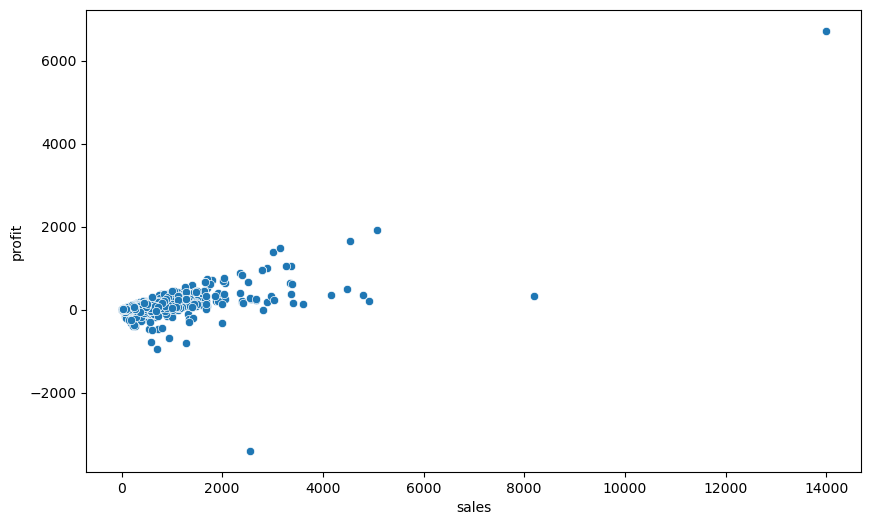

In [52]:
# ScatterPlot for sales and profit
plt.figure(figsize=(10,6))
sns.scatterplot(x='sales',y='profit',data=df)
plt.show()

In [53]:
df.columns

Index(['city', 'state', 'category', 'product_name', 'sales', 'quantity',
       'profit', 'order_year', 'order_month', 'order_day', 'order_dayofweek',
       'order_dayofweek_num', 'ship_year', 'ship_month', 'ship_day',
       'ship_dayofweek', 'ship_dayofweek_num', 'ship_time'],
      dtype='object')

In [55]:
# Create new features 
# Create average sales per category and average sales by region features and drop the category and region column
df['avg_sales_per_category'] = df.groupby('category')['sales'].transform('mean')
df['avg_sales_per_state'] = df.groupby('state')['sales'].transform('mean')

df.drop(['category','state'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()
 

,city,product_name,sales,quantity,profit,order_year,order_month,order_day,order_dayofweek,order_dayofweek_num,ship_year,ship_month,ship_day,ship_dayofweek,ship_dayofweek_num,ship_time,avg_sales_per_category,avg_sales_per_state
0,Los Angeles,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87,2013,6,13,Thu,3,2013,6,17,Mon,0,4,43.782069,228.729475
1,Los Angeles,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17,2011,6,9,Thu,3,2011,6,14,Tue,1,5,98.923454,228.729475
2,Los Angeles,Newell 322,7.28,4.0,1.97,2011,6,9,Thu,3,2011,6,14,Tue,1,5,36.848240,228.729475
3,Los Angeles,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72,2011,6,9,Thu,3,2011,6,14,Tue,1,5,356.261336,228.729475
4,Los Angeles,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78,2011,6,9,Thu,3,2011,6,14,Tue,1,5,118.813397,228.729475


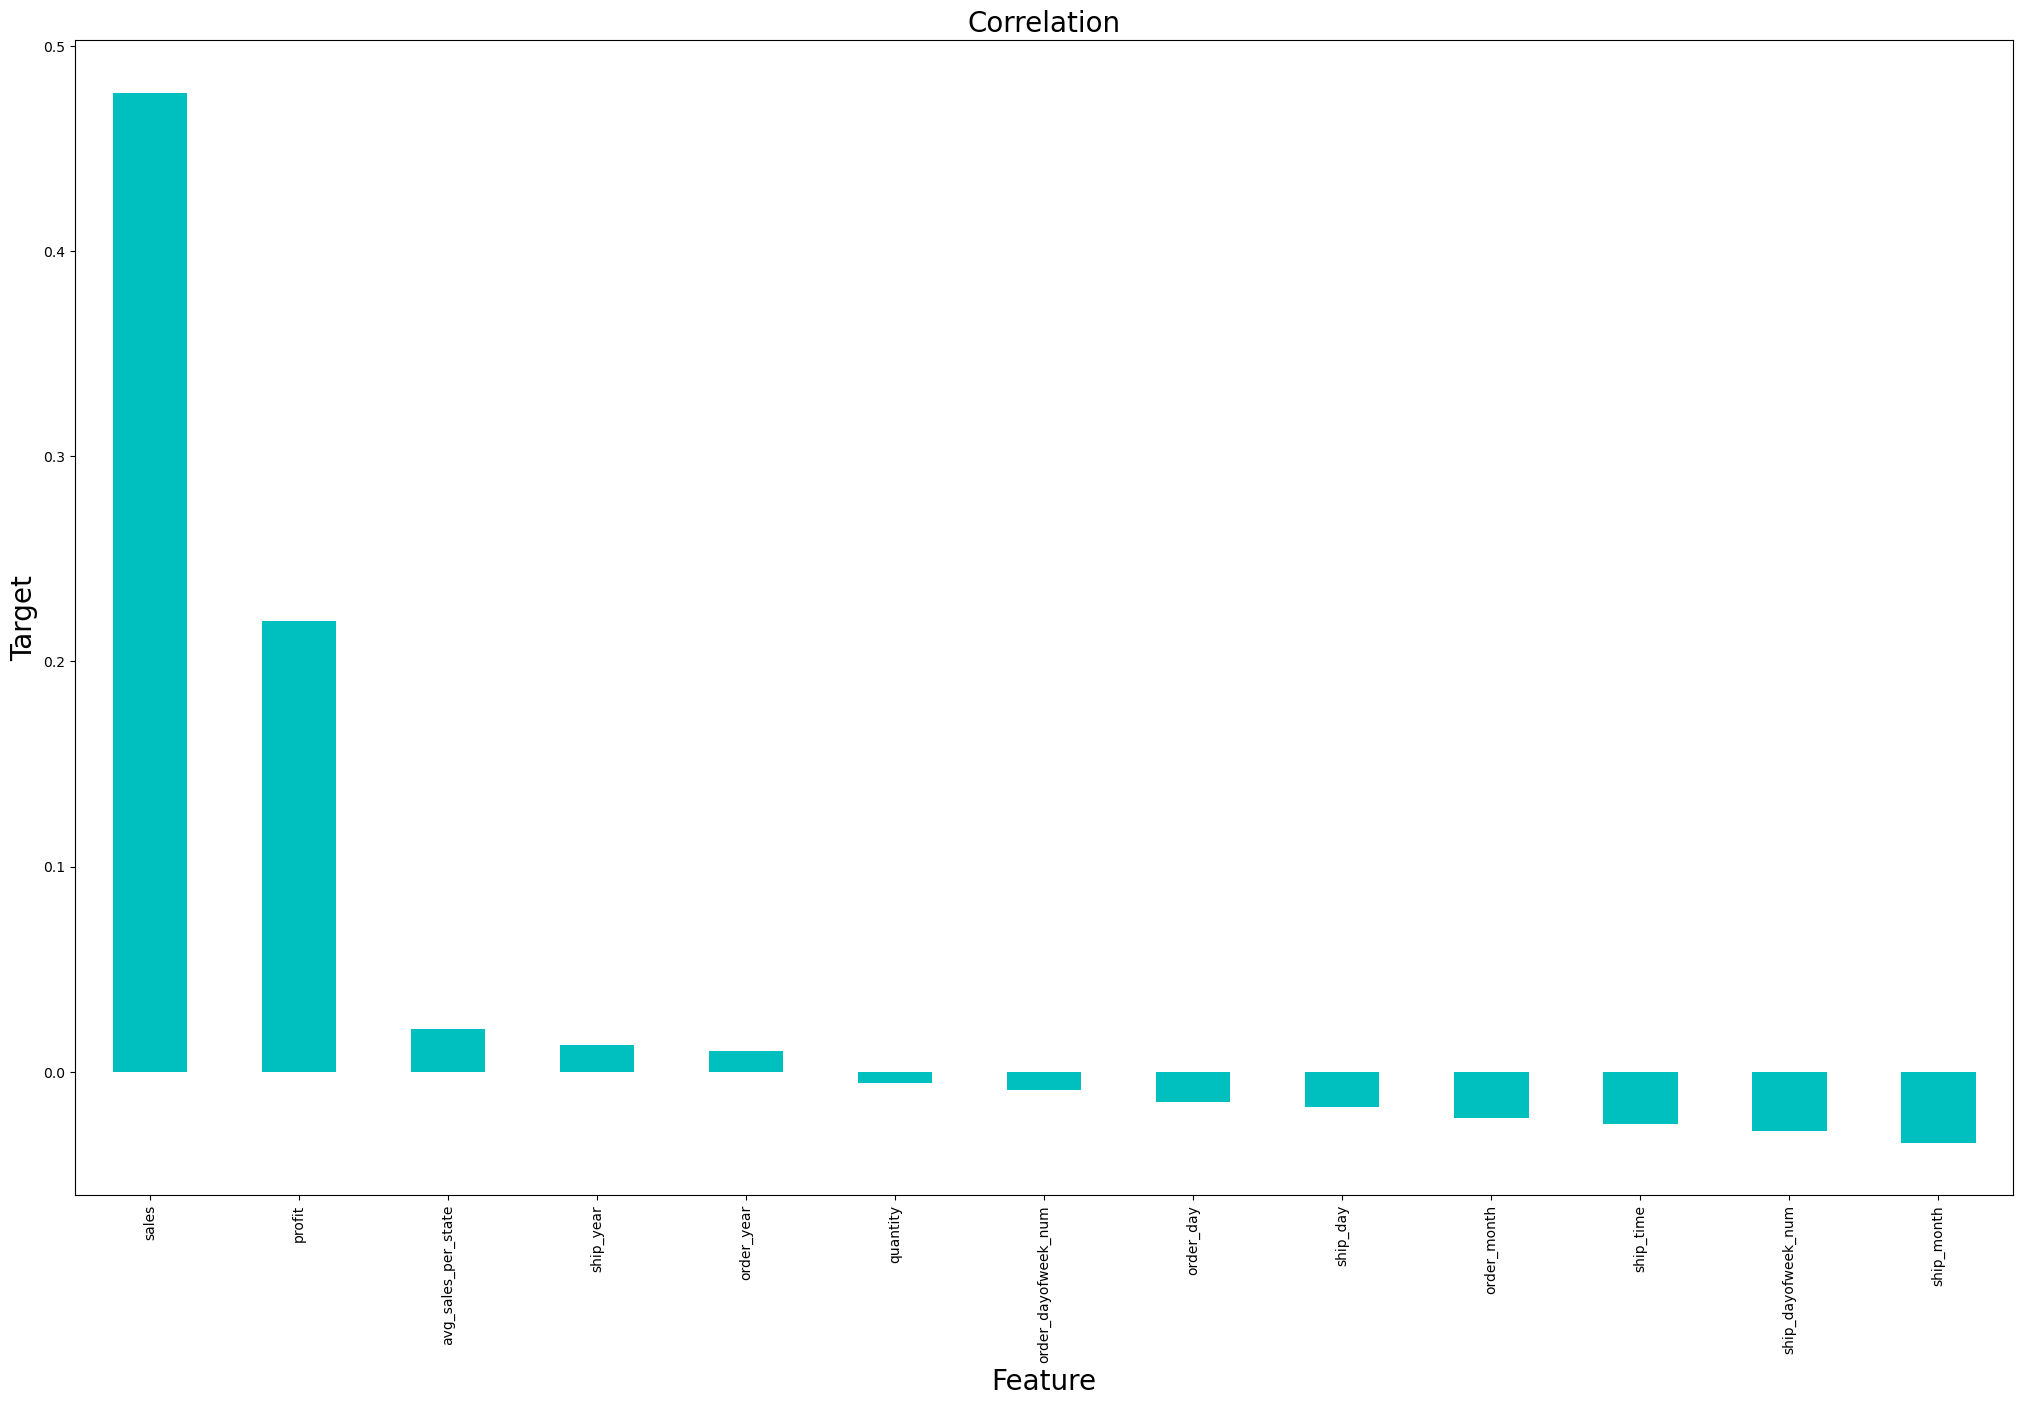

In [56]:
#Visualization of the Correlation Metrics
plt.figure(figsize = (25, 15))

df.corr(numeric_only = True)['avg_sales_per_category'].sort_values(ascending = False).drop(['avg_sales_per_category']).plot(kind = 'bar', color = 'c')

plt.xlabel('Feature', fontsize = 20)

plt.ylabel('Target', fontsize = 20)

plt.title('Correlation', fontsize = 20)

plt.show()

<Axes: >

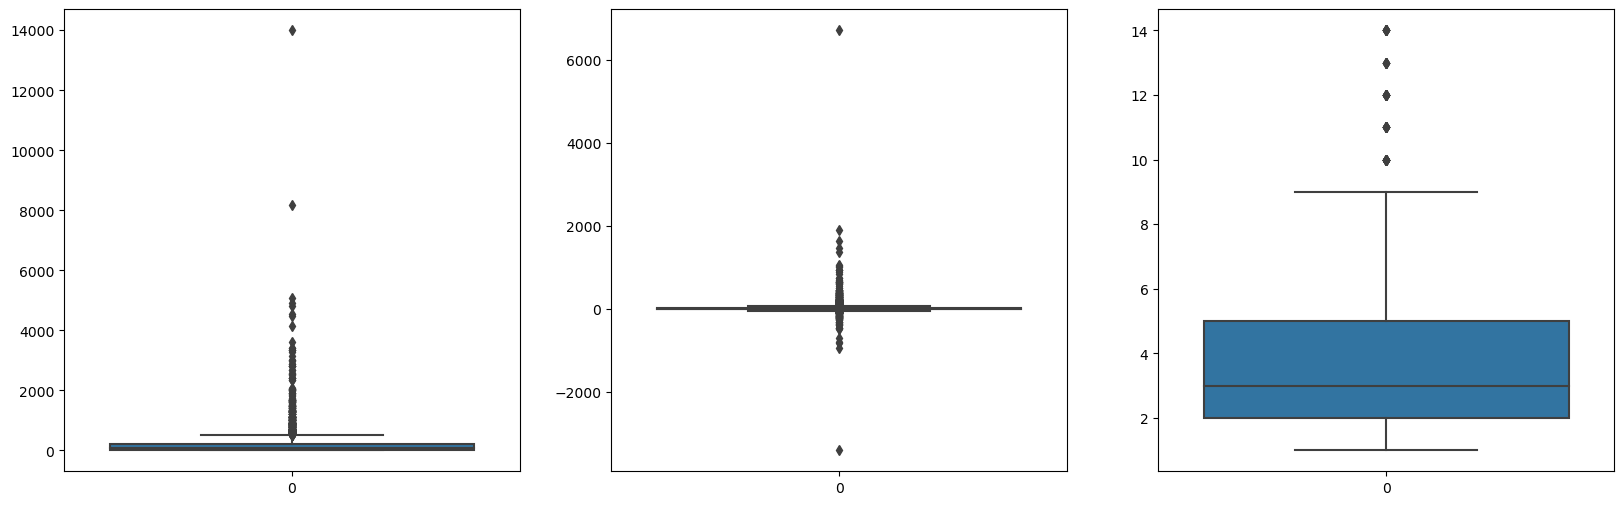

In [57]:
# Box Plot for numerical variable [sales, profit, quantity]
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.boxplot(df['sales'],ax=ax[0])
sns.boxplot(df['profit'],ax=ax[1])
sns.boxplot(df['quantity'],ax=ax[2])

In [58]:
df['profit'].describe()

count    3203.000000
mean       33.849138
std       174.109155
min     -3399.980000
25%         3.850000
50%        11.170000
75%        33.000000
max      6719.980000
Name: profit, dtype: float64

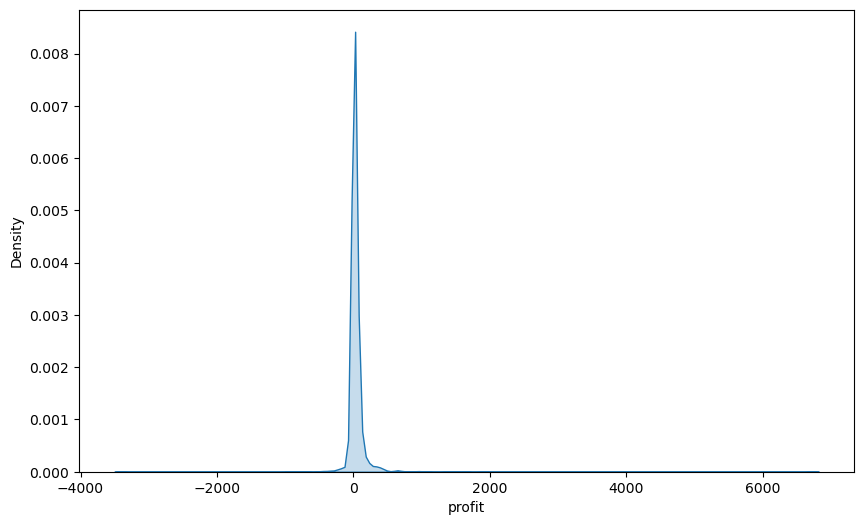

In [59]:
KPlot('profit')

In [60]:
df['sales'].describe()

count     3203.000000
mean       226.493266
std        524.876911
min          0.990000
25%         19.440000
50%         60.840000
75%        215.810000
max      13999.960000
Name: sales, dtype: float64

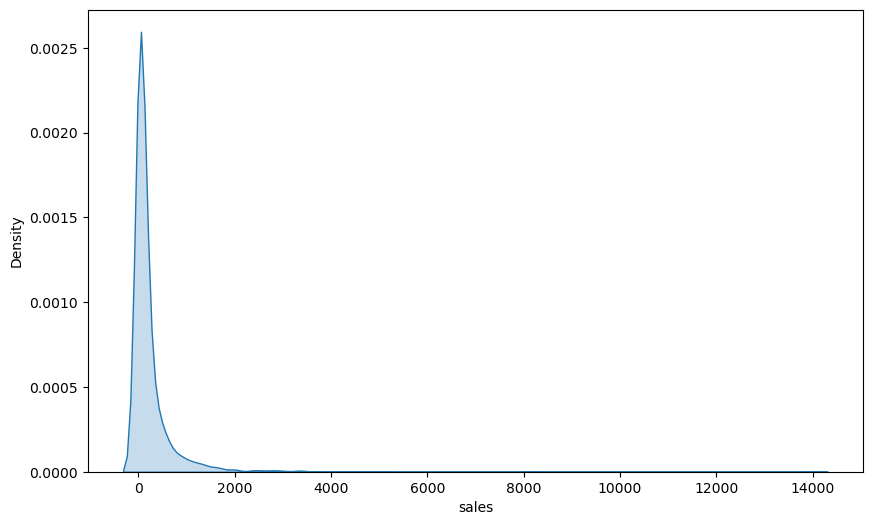

In [61]:
KPlot('sales')

In [62]:
#  check for outliers
outliers = detect_outliers(df,0,['sales','profit','quantity'])
outliers

[3,
 6,
 7,
 13,
 21,
 33,
 48,
 72,
 74,
 80,
 97,
 100,
 105,
 111,
 114,
 116,
 120,
 131,
 134,
 140,
 147,
 156,
 161,
 164,
 171,
 172,
 174,
 200,
 211,
 235,
 237,
 240,
 253,
 255,
 259,
 284,
 286,
 297,
 298,
 308,
 313,
 344,
 358,
 359,
 362,
 364,
 365,
 375,
 376,
 387,
 398,
 411,
 413,
 417,
 418,
 452,
 460,
 464,
 486,
 501,
 503,
 506,
 507,
 509,
 511,
 512,
 531,
 539,
 546,
 556,
 570,
 575,
 596,
 604,
 606,
 641,
 645,
 655,
 664,
 669,
 695,
 697,
 701,
 707,
 711,
 716,
 723,
 727,
 730,
 745,
 760,
 768,
 769,
 771,
 776,
 786,
 787,
 788,
 790,
 799,
 804,
 805,
 810,
 813,
 817,
 838,
 843,
 858,
 864,
 870,
 875,
 876,
 884,
 886,
 896,
 897,
 906,
 914,
 916,
 948,
 969,
 983,
 1002,
 1005,
 1011,
 1012,
 1028,
 1054,
 1058,
 1067,
 1068,
 1075,
 1088,
 1102,
 1117,
 1118,
 1129,
 1137,
 1138,
 1147,
 1151,
 1153,
 1184,
 1185,
 1189,
 1193,
 1198,
 1199,
 1200,
 1207,
 1208,
 1214,
 1226,
 1231,
 1232,
 1233,
 1235,
 1258,
 1265,
 1272,
 1279,
 1289,
 1

In [63]:
#  percentage of the outliers
len(outliers)/df.shape[0] * 100 # 19.5% of the data is outliers

19.54417733374961

In [64]:
#  Replace any outliers in the numerical columns with the upper and lower bounds
def replace_outliers(df,feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.where(df[feature] < lower_bound,lower_bound,df[feature])
    df[feature] = np.where(df[feature] > upper_bound,upper_bound,df[feature])
    return df

In [65]:
for i in ['sales','profit','quantity']:
    df = replace_outliers(df,i)
len(detect_outliers(df,0,['sales','profit','quantity'])) # 0 outliers

0

<Axes: >

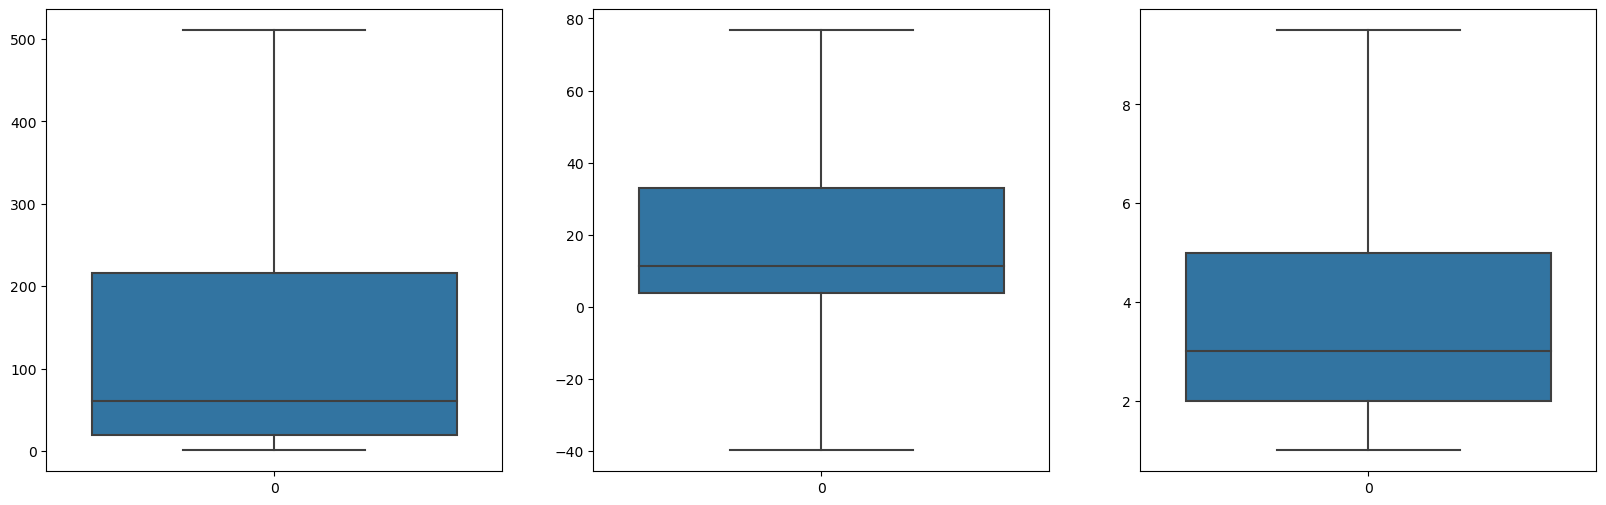

In [66]:
# Box Plot for numerical variable [sales, profit, quantity]
fig,ax = plt.subplots(1,3,figsize=(20,6))
sns.boxplot(df['sales'],ax=ax[0])
sns.boxplot(df['profit'],ax=ax[1])
sns.boxplot(df['quantity'],ax=ax[2])

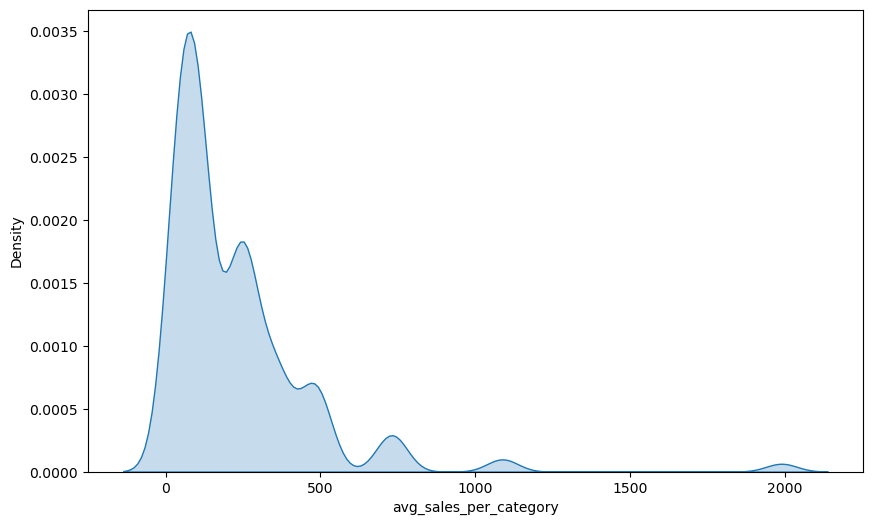

In [67]:
KPlot('avg_sales_per_category')

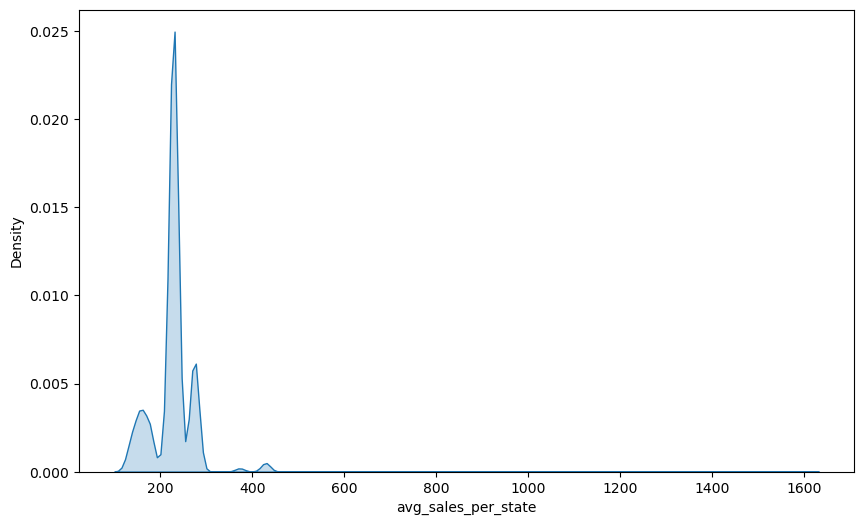

In [68]:
KPlot('avg_sales_per_state')

<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    5]  Data Preprocessing
</p>

In [69]:
df.head()

,city,product_name,sales,quantity,profit,order_year,order_month,order_day,order_dayofweek,order_dayofweek_num,ship_year,ship_month,ship_day,ship_dayofweek,ship_dayofweek_num,ship_time,avg_sales_per_category,avg_sales_per_state
0,Los Angeles,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0,6.870,2013,6,13,Thu,3,2013,6,17,Mon,0,4,43.782069,228.729475
1,Los Angeles,Eldon Expressions Wood and Plastic Desk Access...,48.860,7.0,14.170,2011,6,9,Thu,3,2011,6,14,Tue,1,5,98.923454,228.729475
2,Los Angeles,Newell 322,7.280,4.0,1.970,2011,6,9,Thu,3,2011,6,14,Tue,1,5,36.848240,228.729475
3,Los Angeles,Mitel 5320 IP Phone VoIP phone,510.365,4.0,76.725,2011,6,9,Thu,3,2011,6,14,Tue,1,5,356.261336,228.729475
4,Los Angeles,DXL Angle-View Binders with Locking Rings by S...,18.500,3.0,5.780,2011,6,9,Thu,3,2011,6,14,Tue,1,5,118.813397,228.729475


In [70]:
# Ensuring that ship_dayofweek is after order_dayofweek

df['ship_dayofweek_num'] = np.where(df['ship_dayofweek_num'] < df['order_dayofweek_num'],df['order_dayofweek_num'],df['ship_dayofweek_num'])

In [71]:
# Dropping order_dayofweek, ship_dayofweek columns
df.drop(['order_dayofweek','ship_dayofweek'],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()


,city,product_name,sales,quantity,profit,order_year,order_month,order_day,order_dayofweek_num,ship_year,ship_month,ship_day,ship_dayofweek_num,ship_time,avg_sales_per_category,avg_sales_per_state
0,Los Angeles,Self-Adhesive Address Labels for Typewriters b...,14.620,2.0,6.870,2013,6,13,3,2013,6,17,3,4,43.782069,228.729475
1,Los Angeles,Eldon Expressions Wood and Plastic Desk Access...,48.860,7.0,14.170,2011,6,9,3,2011,6,14,3,5,98.923454,228.729475
2,Los Angeles,Newell 322,7.280,4.0,1.970,2011,6,9,3,2011,6,14,3,5,36.848240,228.729475
3,Los Angeles,Mitel 5320 IP Phone VoIP phone,510.365,4.0,76.725,2011,6,9,3,2011,6,14,3,5,356.261336,228.729475
4,Los Angeles,DXL Angle-View Binders with Locking Rings by S...,18.500,3.0,5.780,2011,6,9,3,2011,6,14,3,5,118.813397,228.729475


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    3203 non-null   object 
 1   product_name            3203 non-null   object 
 2   sales                   3203 non-null   float64
 3   quantity                3203 non-null   float64
 4   profit                  3203 non-null   float64
 5   order_year              3203 non-null   int32  
 6   order_month             3203 non-null   int32  
 7   order_day               3203 non-null   int32  
 8   order_dayofweek_num     3203 non-null   int32  
 9   ship_year               3203 non-null   int32  
 10  ship_month              3203 non-null   int32  
 11  ship_day                3203 non-null   int32  
 12  ship_dayofweek_num      3203 non-null   int32  
 13  ship_time               3203 non-null   int64  
 14  avg_sales_per_category  3203 non-null   

In [73]:
df['quantity'].unique()

array([2. , 7. , 4. , 3. , 5. , 9. , 6. , 8. , 1. , 9.5])

In [74]:
# Change the quantity data type from float to int
df['quantity'] = df['quantity'].astype(int)
df['quantity'].unique()

array([2, 7, 4, 3, 5, 9, 6, 8, 1])

In [75]:
df["product_name"].value_counts()

product_name
Staples                                                 60
Avery Non-Stick Binders                                  8
Bretford Rectangular Conference Table Tops               7
Global Troy Executive Leather Low-Back Tilter            7
SAFCO Arco Folding Chair                                 7
                                                        ..
Avery 505                                                1
RCA ViSYS 25423RE1 Corded phone                          1
Master Giant Foot Doorstop, Safety Yellow                1
Bush Westfield Collection Bookcases, Fully Assembled     1
Avaya 5410 Digital phone                                 1
Name: count, Length: 1494, dtype: int64

In [76]:
df["product_name"].nunique()

1494

<p style = "color: #00FFAB;
            font: bold 22px tahoma;
            background-color: #111;
            padding: 18px;
            border: 3px solid lightgreen;
            border-radius: 8px;
            text-align:center;"> 
    5]  Building Pipeline & Testing the ML models
</p>

In [77]:
x = df.drop('sales',axis=1)
y = df['sales']

In [78]:
num_cols , cat_cols = x.select_dtypes(include=np.number).columns , x.select_dtypes(exclude=np.number).columns
print("Numerical columns are",num_cols)
print("Categorical columns are",cat_cols)

Numerical columns are Index(['quantity', 'profit', 'order_year', 'order_month', 'order_day',
       'order_dayofweek_num', 'ship_year', 'ship_month', 'ship_day',
       'ship_dayofweek_num', 'ship_time', 'avg_sales_per_category',
       'avg_sales_per_state'],
      dtype='object')
Categorical columns are Index(['city', 'product_name'], dtype='object')


In [79]:
BE_cols = ['city', 'product_name']
BE_cols

['city', 'product_name']

In [80]:
from sklearn.preprocessing import RobustScaler
num_pipeline = Pipeline([ ('imputer', KNNImputer(n_neighbors=5)), ('scaler', RobustScaler())])
num_pipeline

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', RobustScaler())])

In [81]:
from category_encoders import BinaryEncoder
be_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')), ('encoder', BinaryEncoder())])
be_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', BinaryEncoder())])

In [82]:
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer([ ('num', num_pipeline, num_cols),
                                    ('be', be_pipeline, BE_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', RobustScaler())]),
                                 Index(['quantity', 'profit', 'order_year', 'order_month', 'order_day',
       'order_dayofweek_num', 'ship_year', 'ship_month', 'ship_day',
       'ship_dayofweek_num', 'ship_time', 'avg_sales_per_category',
       'avg_sales_per_state'],
      dtype='object')),
                                ('be',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', BinaryEncoder())]),
                                 ['city', 'product_name'])])

In [83]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, cross_validate


In [84]:
y.value_counts(normalize= True)*100

sales
510.365    11.489229
12.960      0.811739
19.440      0.624415
32.400      0.405869
302.380     0.280987
             ...    
24.820      0.031221
128.900     0.031221
29.790      0.031221
131.600     0.031221
243.160     0.031221
Name: proportion, Length: 1972, dtype: float64

In [85]:
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


final_pipeline = Pipeline([('preprocessing', preprocessing), ('model', RandomForestRegressor())])
final_pipeline


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['quantity', 'profit', 'order_year', 'order_month', 'order_day',
       'order_dayofweek_num', 'ship_year', 'ship_month', 'ship_day',
       'ship_dayofweek_num', 'ship_time', 'avg_sales_per_category',
       'avg_sales_per_state'],
      dtype='object')),
                                                 ('be',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   BinaryEncoder())]),
                                                  ['city', 'product_name'])])),
                ('model', RandomForestRegressor())])

In [86]:
models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('MLP', MLPRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('ADA', AdaBoostRegressor()))

results = []
names = []
scoring = {'MAE': 'neg_mean_absolute_error', 'MSE': 'neg_mean_squared_error', 'RMSE': 'neg_root_mean_squared_error', 'R2': 'r2'}

for name, model in models:
    model_pipeline = Pipeline([('preprocessing', preprocessing), ('model', model)])
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_validate(model_pipeline, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: MAE: {-cv_results['test_MAE'].mean()}, MSE: {-cv_results['test_MSE'].mean()}, RMSE: {-cv_results['test_RMSE'].mean()}, R²: {cv_results['test_R2'].mean()}")


LR: MAE: 76.44132617450722, MSE: 12398.44162848695, RMSE: 111.16361659397148, R²: 0.5686531710140834
Ridge: MAE: 76.38445388211345, MSE: 12390.270261823895, RMSE: 111.1288502735013, R²: 0.5689382164748302
Lasso: MAE: 76.20693097927008, MSE: 12334.786546911393, RMSE: 110.87694085239954, R²: 0.5710421749228607
ElasticNet: MAE: 87.83261599483951, MSE: 13579.815010767863, RMSE: 116.37735900587715, R²: 0.5278305779609084


KNN: MAE: 70.53125702973006, MSE: 12059.053301845499, RMSE: 109.4326428783138, R²: 0.5814116499610535
CART: MAE: 47.72560840223737, MSE: 9504.23645926017, RMSE: 97.0476219880388, R²: 0.6696684155249313
SVR: MAE: 119.95675189053381, MSE: 35369.37084845207, RMSE: 187.95288225952407, R²: -0.23176125882476412
MLP: MAE: 70.31544104706374, MSE: 10658.799492770873, RMSE: 103.07969293064366, R²: 0.6292236881263846
RF: MAE: 40.168867895412816, MSE: 5278.993915163626, RMSE: 72.23931997458342, R²: 0.8173343757970809
ET: MAE: 39.72313775071437, MSE: 4831.137900953337, RMSE: 69.16355015118054, R²: 0.8325011996337677
GB: MAE: 43.18893178763576, MSE: 5429.913135524218, RMSE: 73.32898757712626, R²: 0.8117843349938939
ADA: MAE: 65.54242927525031, MSE: 7965.767090263611, RMSE: 89.06375266421647, R²: 0.7233475458491607


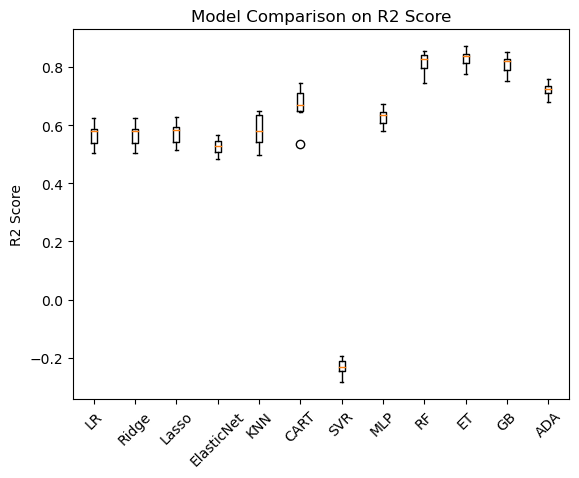

In [87]:
# Plotting the results
fig, ax = plt.subplots()
for i in range(len(results)):
    ax.boxplot(results[i]['test_R2'], positions=[i], labels=[names[i]])
ax.set_ylabel('R2 Score')
ax.set_title('Model Comparison on R2 Score')
plt.xticks(rotation=45)
plt.show()

# Based on your results, the ExtraTreesRegressor (ET) model appears to have the best performance in terms of both the mean squared error (MSE) and R-squared (R²) metrics. 

In [ ]:
# install bayes_opt
! pip install bayes

In [89]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from bayes_opt import BayesianOptimization


# Function to perform cross-validation and return the mean cross-validation score
def extra_trees_cv(n_estimators, max_features, max_depth, min_samples_split):
    # Define the model with parameters to tune
    model = ExtraTreesRegressor(
        n_estimators=int(n_estimators),
        max_features=min(max_features, 0.999), # to ensure max_features is between 0 and 1
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        random_state=42
    )
    
    # Wrap the model in a pipeline if there is preprocessing
    model_pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('model', model)
    ])
    
    # Cross-validation
    cv_score = cross_val_score(model_pipeline, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return cv_score.mean()

# Define the range for each parameter
param_bounds = {
    'n_estimators': (100, 500),
    'max_features': (0.1, 0.999),
    'max_depth': (10, 50),
    'min_samples_split': (2, 20)
}

# Bayesian Optimization
optimizer = BayesianOptimization(
    f=extra_trees_cv,
    pbounds=param_bounds,
    random_state=42,
    verbose=2
)

# Perform the optimization
optimizer.maximize(
    init_points=10,
    n_iter=30,
)

# Best parameters found
print("Best parameters: ", optimizer.max)

|   iter    |  target   | max_depth | max_fe... | min_sa... | n_esti... |
-------------------------------------------------------------------------
| 1         | -5.138e+0 | 24.98     | 0.9547    | 15.18     | 339.5     |
| 2         | -7.946e+0 | 16.24     | 0.2402    | 3.046     | 446.5     |
| 3         | -5.135e+0 | 34.04     | 0.7366    | 2.371     | 488.0     |
| 4         | -6.969e+0 | 43.3      | 0.2909    | 5.273     | 173.4     |
| 5         | -5.487e+0 | 22.17     | 0.5718    | 9.775     | 216.5     |
| 6         | -8.152e+0 | 34.47     | 0.2254    | 7.259     | 246.5     |
| 7         | -5.097e+0 | 28.24     | 0.8059    | 5.594     | 305.7     |
| 8         | -1.207e+0 | 33.7      | 0.1418    | 12.94     | 168.2     |
| 9         | -5.24e+03 | 12.6      | 0.953     | 19.38     | 423.4     |
| 10        | -9.446e+0 | 22.18     | 0.1878    | 14.32     | 276.1     |
| 11        | -6.235e+0 | 25.59     | 0.4191    | 15.12     | 339.2     |
| 12        | -1.222e+0 | 22.48     | 

In [90]:
#  Fit the model with the best parameters 
best_params = optimizer.max['params']
model = ExtraTreesRegressor(
    n_estimators=int(best_params['n_estimators']),
    max_features=best_params['max_features'],
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    random_state=42
)

model_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('model', model)
])

model_pipeline.fit(x_train, y_train)

# Predictions
y_pred = model_pipeline.predict(x_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}")


MAE: 39.50453891101572, MSE: 4827.733879773225, RMSE: 69.48189605770143, R²: 0.8465361462140113


In [91]:
# Data frame 
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.head()

,Actual,Predicted
3008,419.94,413.593056
102,47.98,80.812774
862,95.65,87.062425
867,35.34,44.975316
999,31.84,42.182525


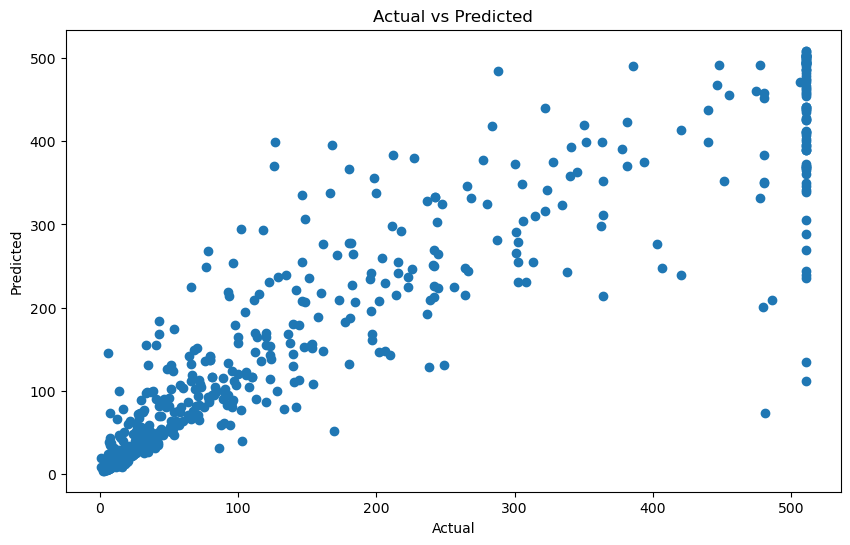

In [92]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## Model Evaluation Results

We evaluated our predictive model using an `ExtraTreesRegressor`, which is part of a comprehensive pipeline that includes preprocessing and model fitting stages. Below, we discuss the key metrics used to quantify the model's performance on the test set.

### Mean Absolute Error (MAE): 39.5045

- **Description**: The Mean Absolute Error (MAE) represents the average absolute difference between the actual values (`y_test`) and the predictions (`y_pred`).
- **Interpretation**: A lower MAE suggests better model accuracy. Here, the average error the model makes in predicting the output variable is approximately 39.5 units. The acceptability of this score largely depends on the scale and context of the target variable.

### Mean Squared Error (MSE): 4827.7339

- **Description**: The Mean Squared Error (MSE) is the average of the squares of the errors—that is, the average squared difference between the actual values and the predicted values. MSE emphasizes larger errors more significantly due to squaring.
- **Interpretation**: With an MSE of about 4827.7, indicating the presence of some large errors. This suggests that when the model is inaccurate, it can be significantly so, which might be crucial if large errors are particularly undesirable in our application.

### Root Mean Squared Error (RMSE): 69.4819

- **Description**: The Root Mean Squared Error (RMSE) is the square root of the MSE and provides a measure of the magnitude of error in the same units as the target variable.
- **Interpretation**: With an RMSE of approximately 69.5, this value indicates how widely your predictions deviate from the actual values on average. Like the MAE, the acceptability of this number depends on the context.

### R-squared (R²): 0.8465

- **Description**: R², or the coefficient of determination, is a statistical measure of how well the regression predictions approximate the real data points.
- **Interpretation**: An R² of 0.8465 means that approximately 84.65% of the variation in the dependent variable is explained by the independent variables in the model. This is generally considered a good R² value, suggesting that your model explains a large portion of the variability in the target variable.

### Conclusion

Overall, the model is performing reasonably well, particularly in terms of R². However, the relatively high values of MSE and RMSE compared to the MAE suggest that there are some predictions where the error is quite large. This could potentially be addressed by further tuning the model's parameters, exploring different preprocessing techniques, or examining outliers in this dataset.
